<div style="display:fill;
            border-radius:15px;
            background-color:yellow;
            font-size:210%;
            font-family:Vardana;
            letter-spacing:0.5px;
            padding:10px;
            color:black;
            border-style: solid;
            border-color: red;
            text-align:center;">
<b> Customer Churn EDA and Prediction👨  </b>
</div>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

<blockquote style="margin-right:auto; margin-left:auto; background-color: yellow; padding: 1em; margin:2px;font-size:18px;font-family:Comic Sans Ms;color:Black;letter-spacing:0.7px;text-align: justify;">

---

## 2. Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python

In [2]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

In [3]:
print(f"\033[034m\033[1m")
print("Features Name of Clients:")
print(f"\033[031m\033[1m")
print(client_df.columns.tolist())
print(f"\033[035m\033[1m")
print("clients_Data Shape :")
print(client_df.shape)

print("Features Name of Price:")
print(f"\033[031m\033[1m")
print(price_df.columns.tolist())
print(f"\033[035m\033[1m")
print("price_Data Shape :")
print(price_df.shape)



Features Name of Clients:

['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn']

clients_Data Shape :
(14606, 26)
Features Name of Price:

['id', 'price_date', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']

price_Data Shape :
(193002, 8)


In [4]:
client_df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t      0.00   
1      2009-08-21   2015-08-31             189.95  ...        f      0.00   
2      2010-04-16   2015-04-17              47.96  ...        f      0.00   
3      2010-03-30   2015-03-31             240.04  ...        f      0.00   
4      2010-01-13   2015-03-09             445.75  ...        f     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
3               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0  
4               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0  

[5 rows x 26 columns]

In [5]:
price_df.head()

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

---

## 3. Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #FAFAD2; padding: 1em; margin:1.5px;font-size:15px;font-family:Comic Sans Ms;color:#660000;letter-spacing:0.7px;text-align: justify;">
    
    
 # Client Data

## Overview

The `client_data.csv` file contains information about clients, including their activity, consumption patterns, contract details, and churn status.

### Fields

- **id:** Client company identifier.
- **activity_new:** Category of the company's activity.
- **channel_sales:** Code of the sales channel.
- **cons_12m:** Electricity consumption of the past 12 months.
- **cons_gas_12m:** Gas consumption of the past 12 months.
- **cons_last_month:** Electricity consumption of the last month.
- **date_activ:** Date of activation of the contract.
- **date_end:** Registered date of the end of the contract.
- **date_modif_prod:** Date of the last modification of the product.
- **date_renewal:** Date of the next contract renewal.
- **forecast_cons_12m:** Forecasted electricity consumption for the next 12 months.
- **forecast_cons_year:** Forecasted electricity consumption for the next calendar year.
- **forecast_discount_energy:** Forecasted value of the current discount.
- **forecast_meter_rent_12m:** Forecasted bill of meter rental for the next 2 months.
- **forecast_price_energy_off_peak:** Forecasted energy price for the 1st period (off-peak).
- **forecast_price_energy_peak:** Forecasted energy price for the 2nd period (peak).
- **forecast_price_pow_off_peak:** Forecasted power price for the 1st period (off-peak).
- **has_gas:** Indicates if the client is also a gas client.
- **imp_cons:** Current paid consumption.
- **margin_gross_pow_ele:** Gross margin on power subscription.
- **margin_net_pow_ele:** Net margin on power subscription.
- **nb_prod_act:** Number of active products and services.
- **net_margin:** Total net margin.
- **num_years_antig:** Antiquity of the client (in number of years).
- **origin_up:** Code of the electricity campaign the customer first subscribed to.
- **pow_max:** Subscribed power.
- **churn:** Indicates whether the client has churned over the next 3 months.

Note: Some fields are hashed text strings for privacy preservation, but they may still have predictive power.

# Price Data

## Overview

The `price_data.csv` file contains information about pricing for different periods.

### Fields

- **id:** Client company identifier.
- **price_date:** Reference date.
- **price_off_peak_var:** Price of energy for the 1st period (off-peak).
- **price_peak_var:** Price of energy for the 2nd period (peak).
- **price_mid_peak_var:** Price of energy for the 3rd period (mid-peak).
- **price_off_peak_fix:** Price of power for the 1st period (off-peak).
- **price_peak_fix:** Price of power for the 2nd period (peak).
- **price_mid_peak_fix:** Price of power for the 3rd period (mid-peak).

Note: Some fields are hashed text strings for privacy preservation, but they may still have predictive power.

    
    
    

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


we can see that all of the `datetime` related columns are not currently in datetime format. We will need to convert these later.

### Statistics

Now let's look at some statistics about the datasets

In [8]:
client_df.describe().round(2).T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["min",], color='green')\
                     .bar(subset=["mean",], color='Orange')\
                     .bar(subset=['std'], color='pink')\
                     .bar(subset=['50%'], color='magenta')

The describe method gives us a lot of information about the client data. The key point to take away from this is that we have highly skewed data, as exhibited by the percentile values.

In [9]:
price_df.describe().round(2).T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["min",], color='green')\
                     .bar(subset=["mean",], color='Orange')\
                     .bar(subset=['std'], color='pink')\
                     .bar(subset=['50%'], color='magenta')

Overall the price data looks good.

In [10]:
# to check for duplicated value
client_df.duplicated().any()

False

In [11]:
# to check for duplicated value
price_df.duplicated().any()

False

---

## 3. Data visualization

Now let's dive a bit deeper into the dataframes

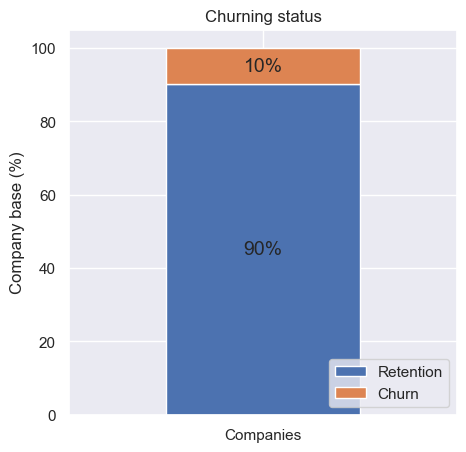

In [12]:


# Extract churn data and rename columns
churn_data = client_df[['id', 'churn']]
churn_data.columns = ['Companies', 'churn']

# Calculate churn totals and percentages
total_churn = churn_data.groupby(churn_data['churn']).count()
percentage_churn = total_churn / total_churn.sum() * 100

# Create a bar plot with annotations
fig, ax = plt.subplots(figsize=(5, 5))
ax = percentage_churn.transpose().plot(kind="bar", stacked=True, rot=0, ax=ax)
ax.set_title("Churning status")

# Add annotations to bars
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy() 
    ax.text(x + width/2, y + height/2, f'{height/100:.0%}', ha='center', va='center', fontsize=14)

# Rename legend and set labels
ax.legend(["Retention", "Churn"], loc="lower right")
ax.set_ylabel("Company base (%)")

# Display the plot
plt.show()


About 10% of the total customers have churned. (This sounds about right)

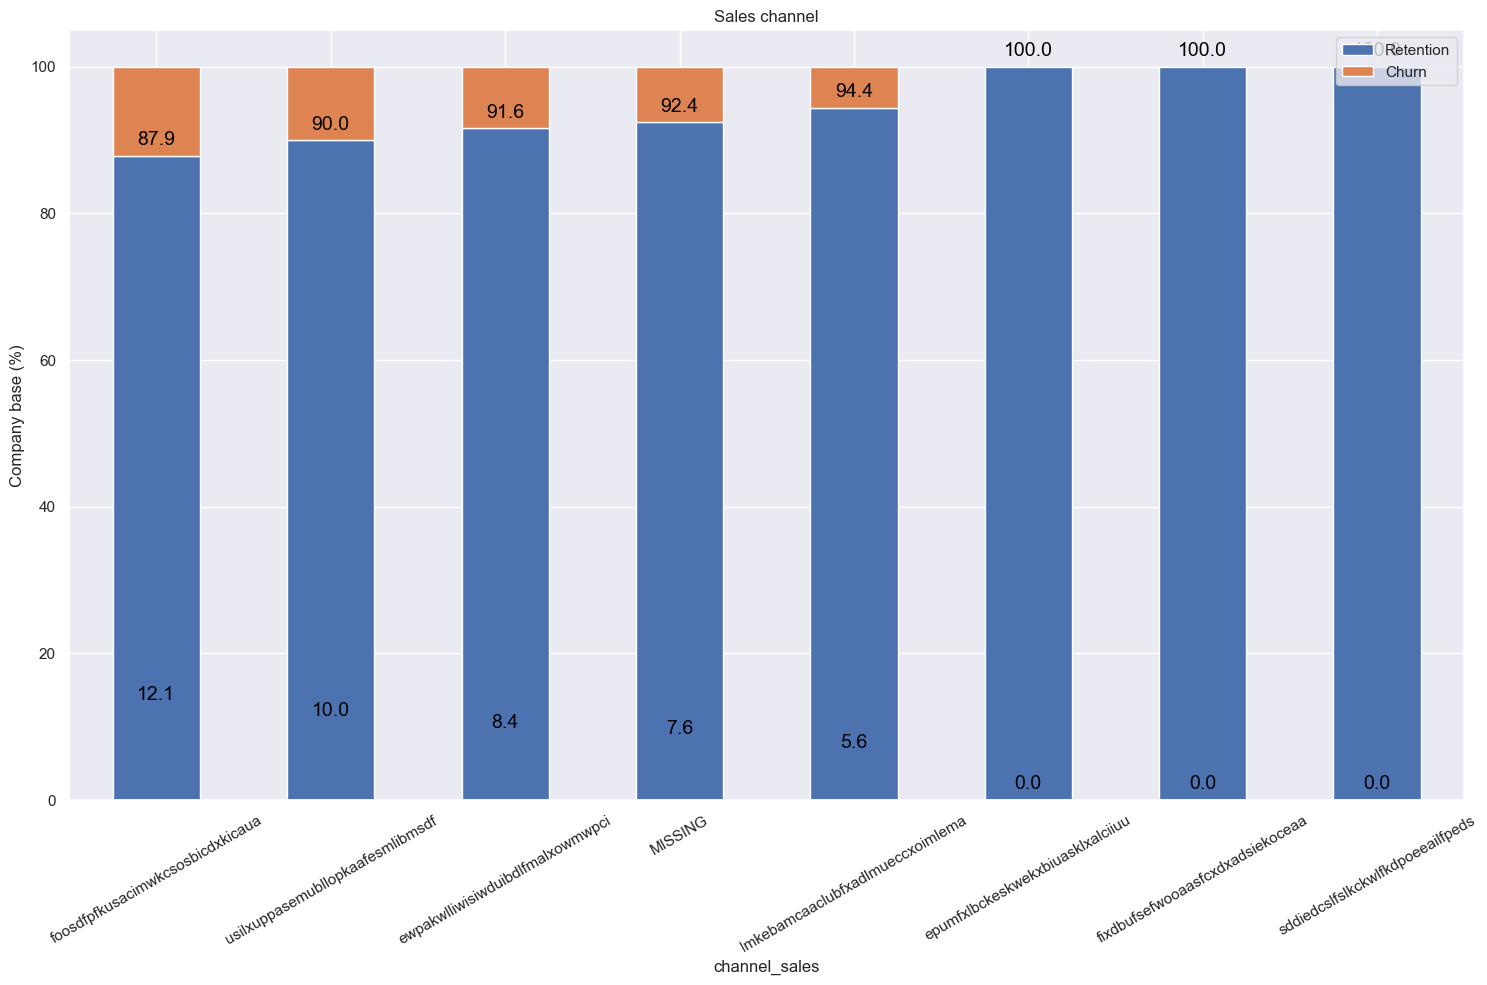

In [13]:
# Extract channel data and calculate churn counts and percentages
channel_data = client_df[['id', 'channel_sales', 'churn']]
channel_counts = channel_data.groupby(['channel_sales', 'churn'])['id'].count().unstack(level=1).fillna(0)
channel_churn_percentages = (channel_counts.div(channel_counts.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

def create_stacked_bar_chart(df, title, size=(18, 10), rotation=0, legend_position="upper right"):
    """
    Create a stacked bar chart with annotations
    """
    # Create the bar chart
    ax = df.plot(kind="bar", stacked=True, figsize=size, rot=rotation, title=title)

    # Add annotations to each bar
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,                      # Vertically align label differently for
                                        # positive and negative values.
            color='black',              # Set text color
            fontsize=14                 # Set text size
        )

    # Set the legend and labels
    plt.legend(["Retention", "Churn"], loc=legend_position)
    plt.ylabel("Company base (%)")

    # Display the chart
    plt.show()

# Call the function to create the chart
create_stacked_bar_chart(channel_churn_percentages, 'Sales channel', rotation=30)


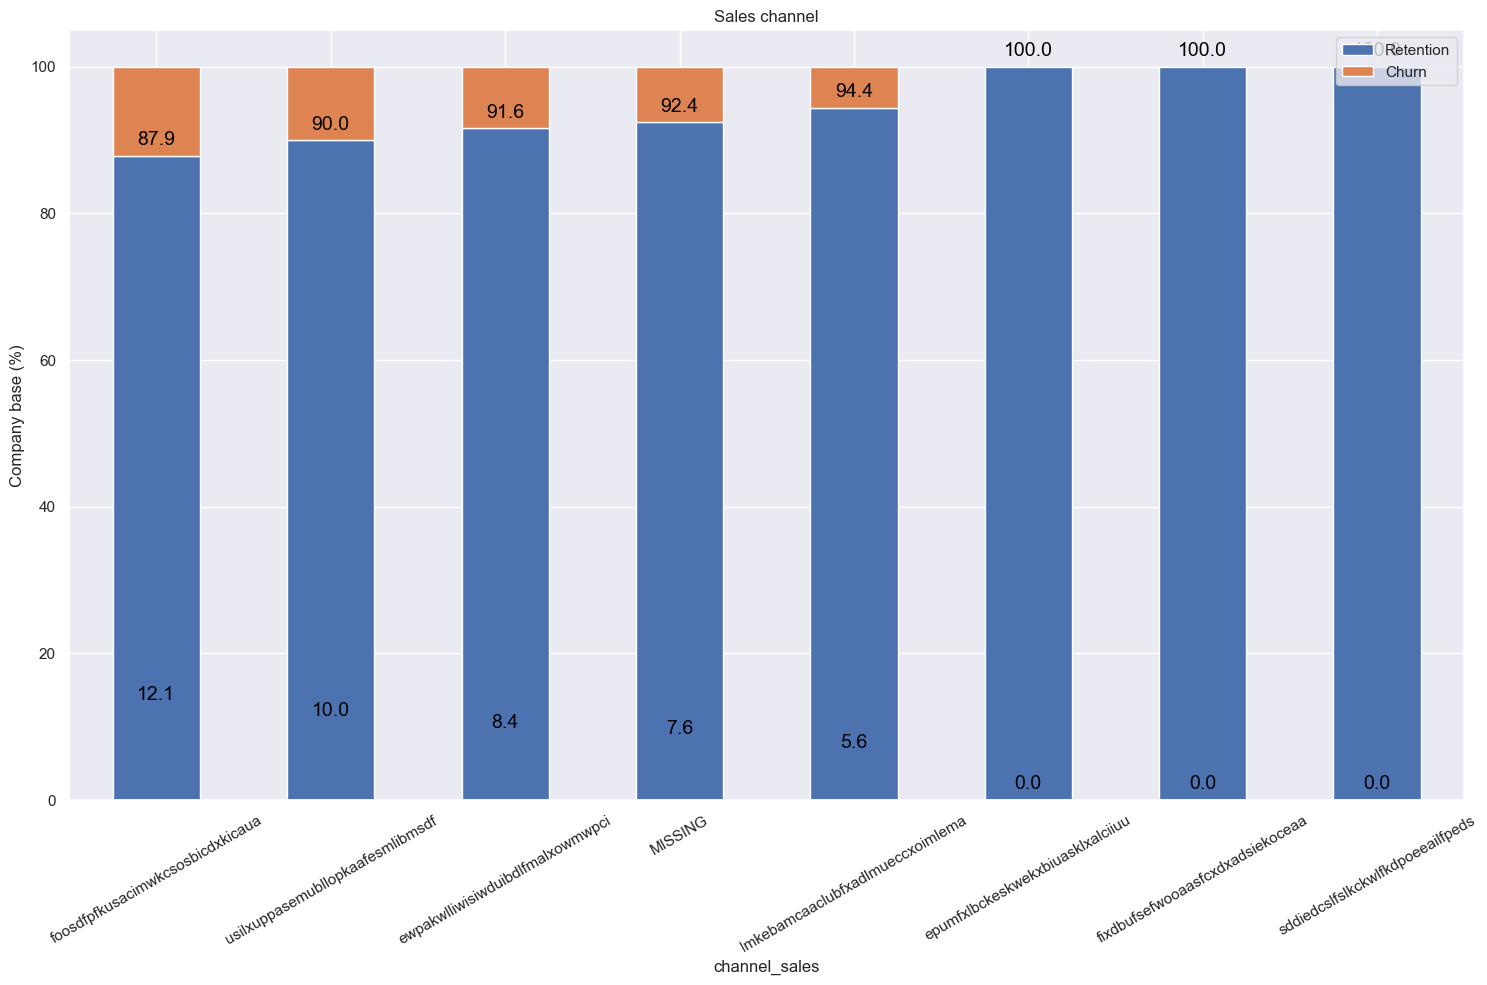

In [14]:

# Extract channel data and calculate churn counts and percentages
channel_data = client_df[['id', 'channel_sales', 'churn']]
channel_counts = channel_data.groupby(['channel_sales', 'churn'])['id'].count().unstack(level=1).fillna(0)
channel_churn_percentages = (channel_counts.div(channel_counts.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

create_stacked_bar_chart(channel_churn_percentages, 'Sales channel', rotation=30)


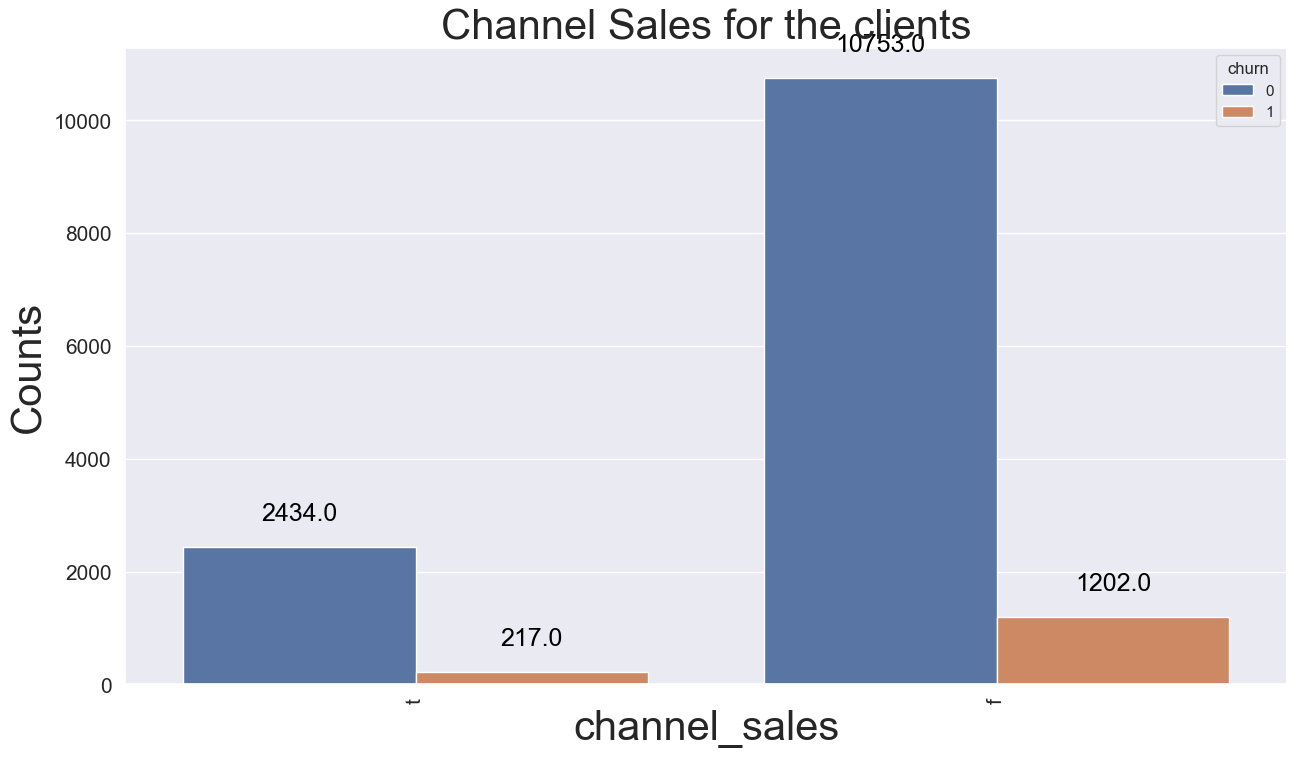

In [15]:

# Set the figure size
plt.figure(figsize=(15, 8.27))

# Create the countplot
ax = sns.countplot(x='has_gas', data=client_df, hue="churn")

# Add annotations to each bar
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2., height,
            f'{height}\n', ha='center', va='baseline', color='black', size=18)

# Set the title and labels
plt.title("Channel Sales for the clients", size=30)
plt.xticks(rotation=90, size=15)
plt.xlabel("channel_sales", size=30)
plt.ylabel("Counts", size=30)
plt.yticks(size=15)

# Display the plot
plt.show()


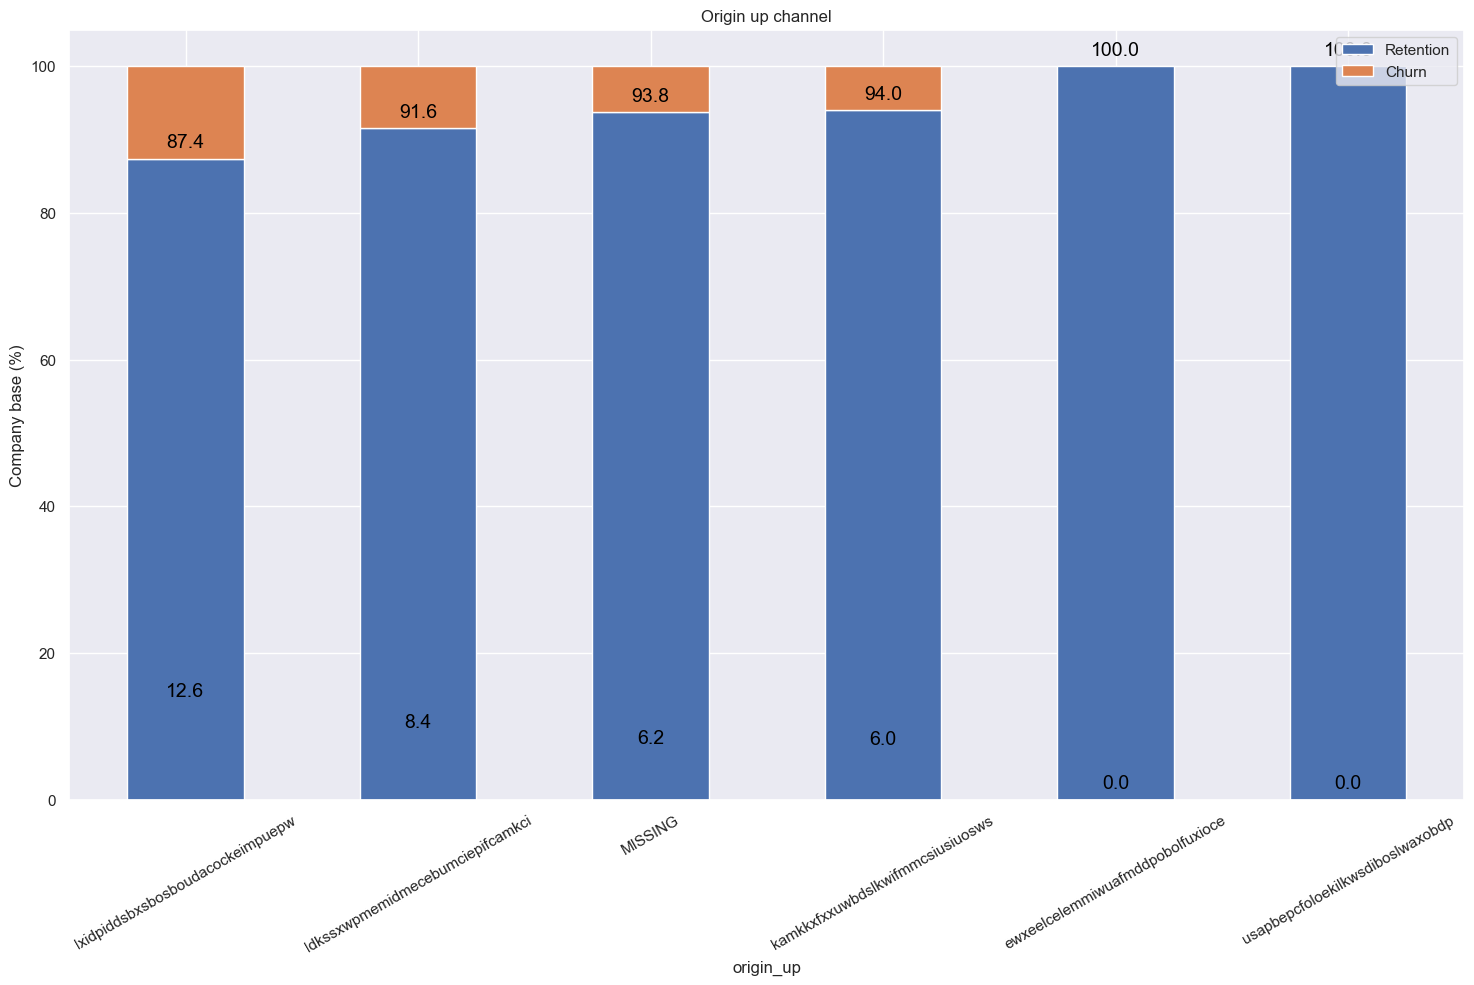

In [16]:


# Extract origin and churn data, and calculate churn counts
origin_data = client_df[['id', 'origin_up', 'churn']]
origin_counts = origin_data.groupby(['origin_up', 'churn'])['id'].count().unstack(level=1).fillna(0)

# Calculate churn percentages
origin_churn_percentages = (origin_counts.div(origin_counts.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# Call the function to create the chart
create_stacked_bar_chart(origin_churn_percentages, 'Origin up channel', rotation=30)


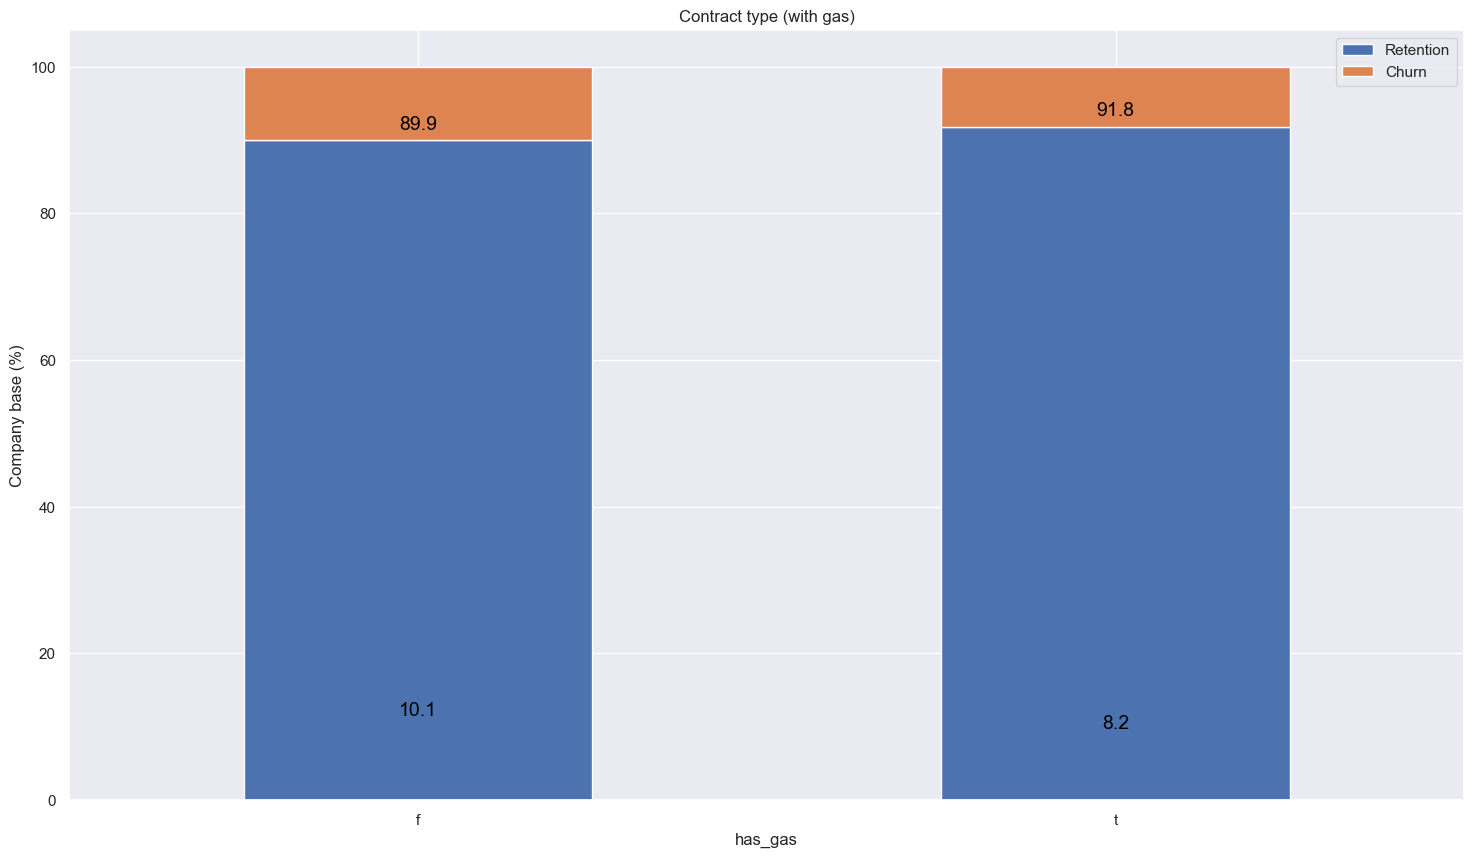

In [17]:
# Extract contract type data and calculate churn counts
contract_data = client_df[['id', 'has_gas', 'churn']]
contract_counts = contract_data.groupby(['churn', 'has_gas'])['id'].count().unstack(level=0)

# Calculate churn percentages
contract_percentages = (contract_counts.div(contract_counts.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# Call the function to create the chart
create_stacked_bar_chart(contract_percentages, 'Contract type (with gas)')


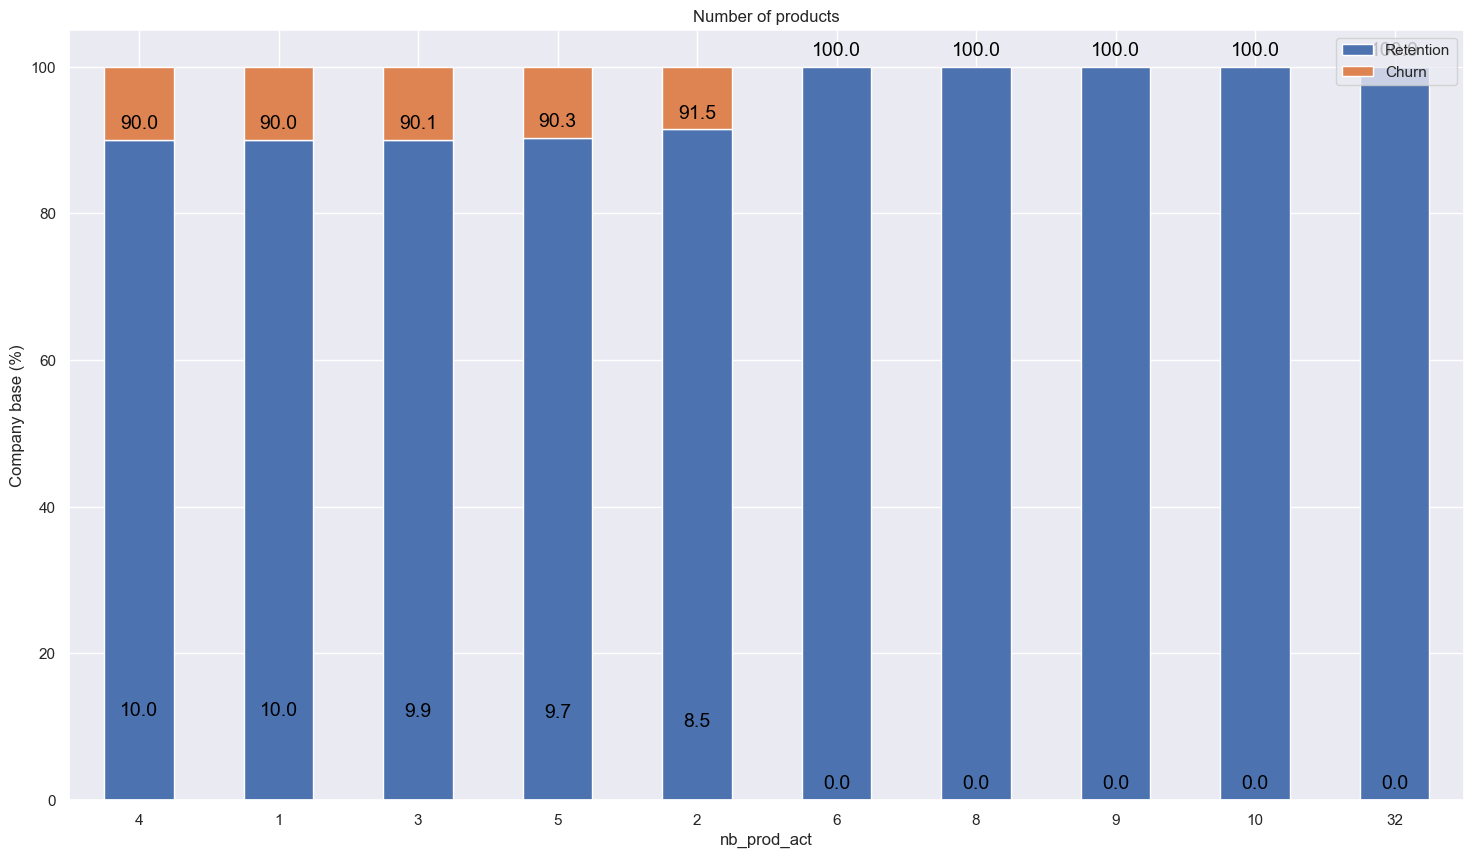

In [18]:
# Extract product data and calculate churn counts
product_data = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
product_counts = product_data.groupby(['nb_prod_act', 'churn'])['id'].count().unstack(level=1)

# Calculate churn percentages
product_percentages = (product_counts.div(product_counts.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# Call the function to create the chart
create_stacked_bar_chart(product_percentages, "Number of products")


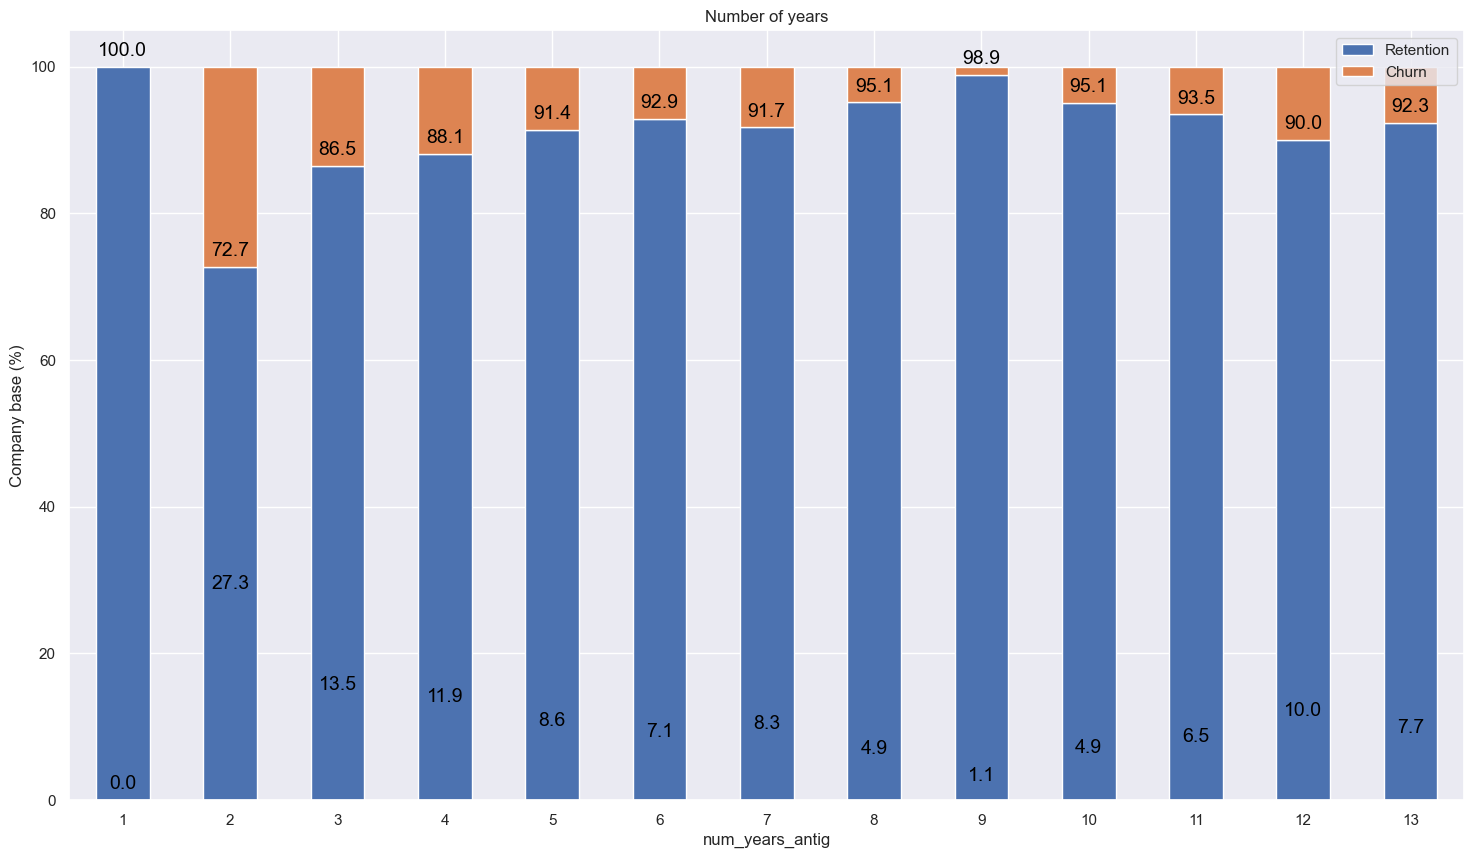

In [19]:
# Extract years data and calculate churn counts
years_data = product_data.groupby(['num_years_antig', 'churn'])['id'].count().unstack(level=1)

# Calculate churn percentages
years_percentages = (years_data.div(years_data.sum(axis=1), axis=0) * 100)

# Call the function to create the chart
create_stacked_bar_chart(years_percentages, "Number of years")


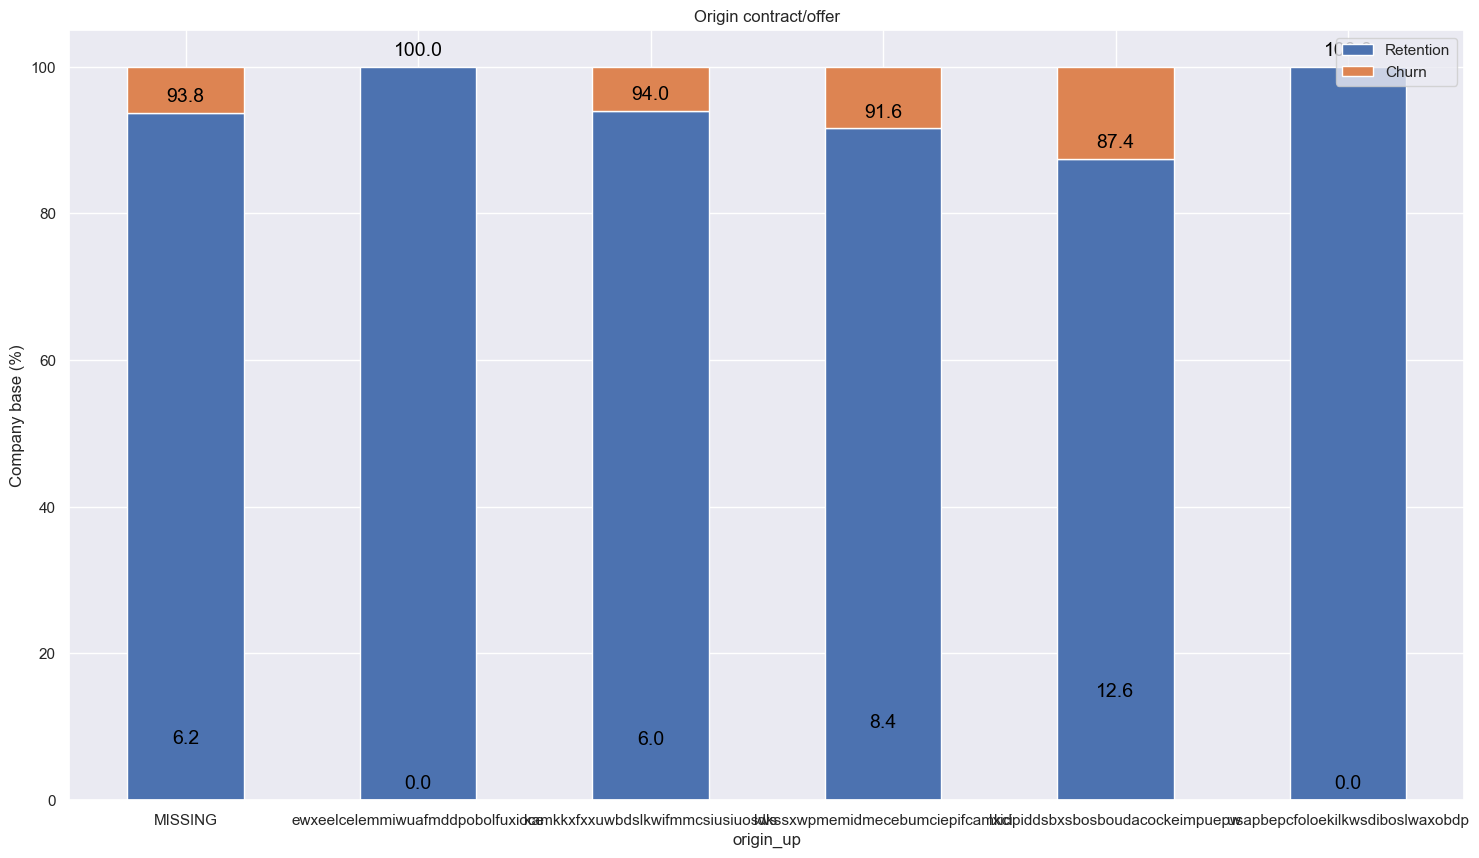

In [20]:
# Extract origin data and calculate churn counts
origin_data = product_data.groupby(['origin_up', 'churn'])['id'].count().unstack(level=1)

# Calculate churn percentages
origin_percentages = (origin_data.div(origin_data.sum(axis=1), axis=0) * 100)

# Call the function to create the chart
create_stacked_bar_chart(origin_percentages, "Origin contract/offer")


### Consumption

Let's see the distribution of the consumption in the last year and month. Since the consumption data is univariate, let's use histograms to visualize their distribution.

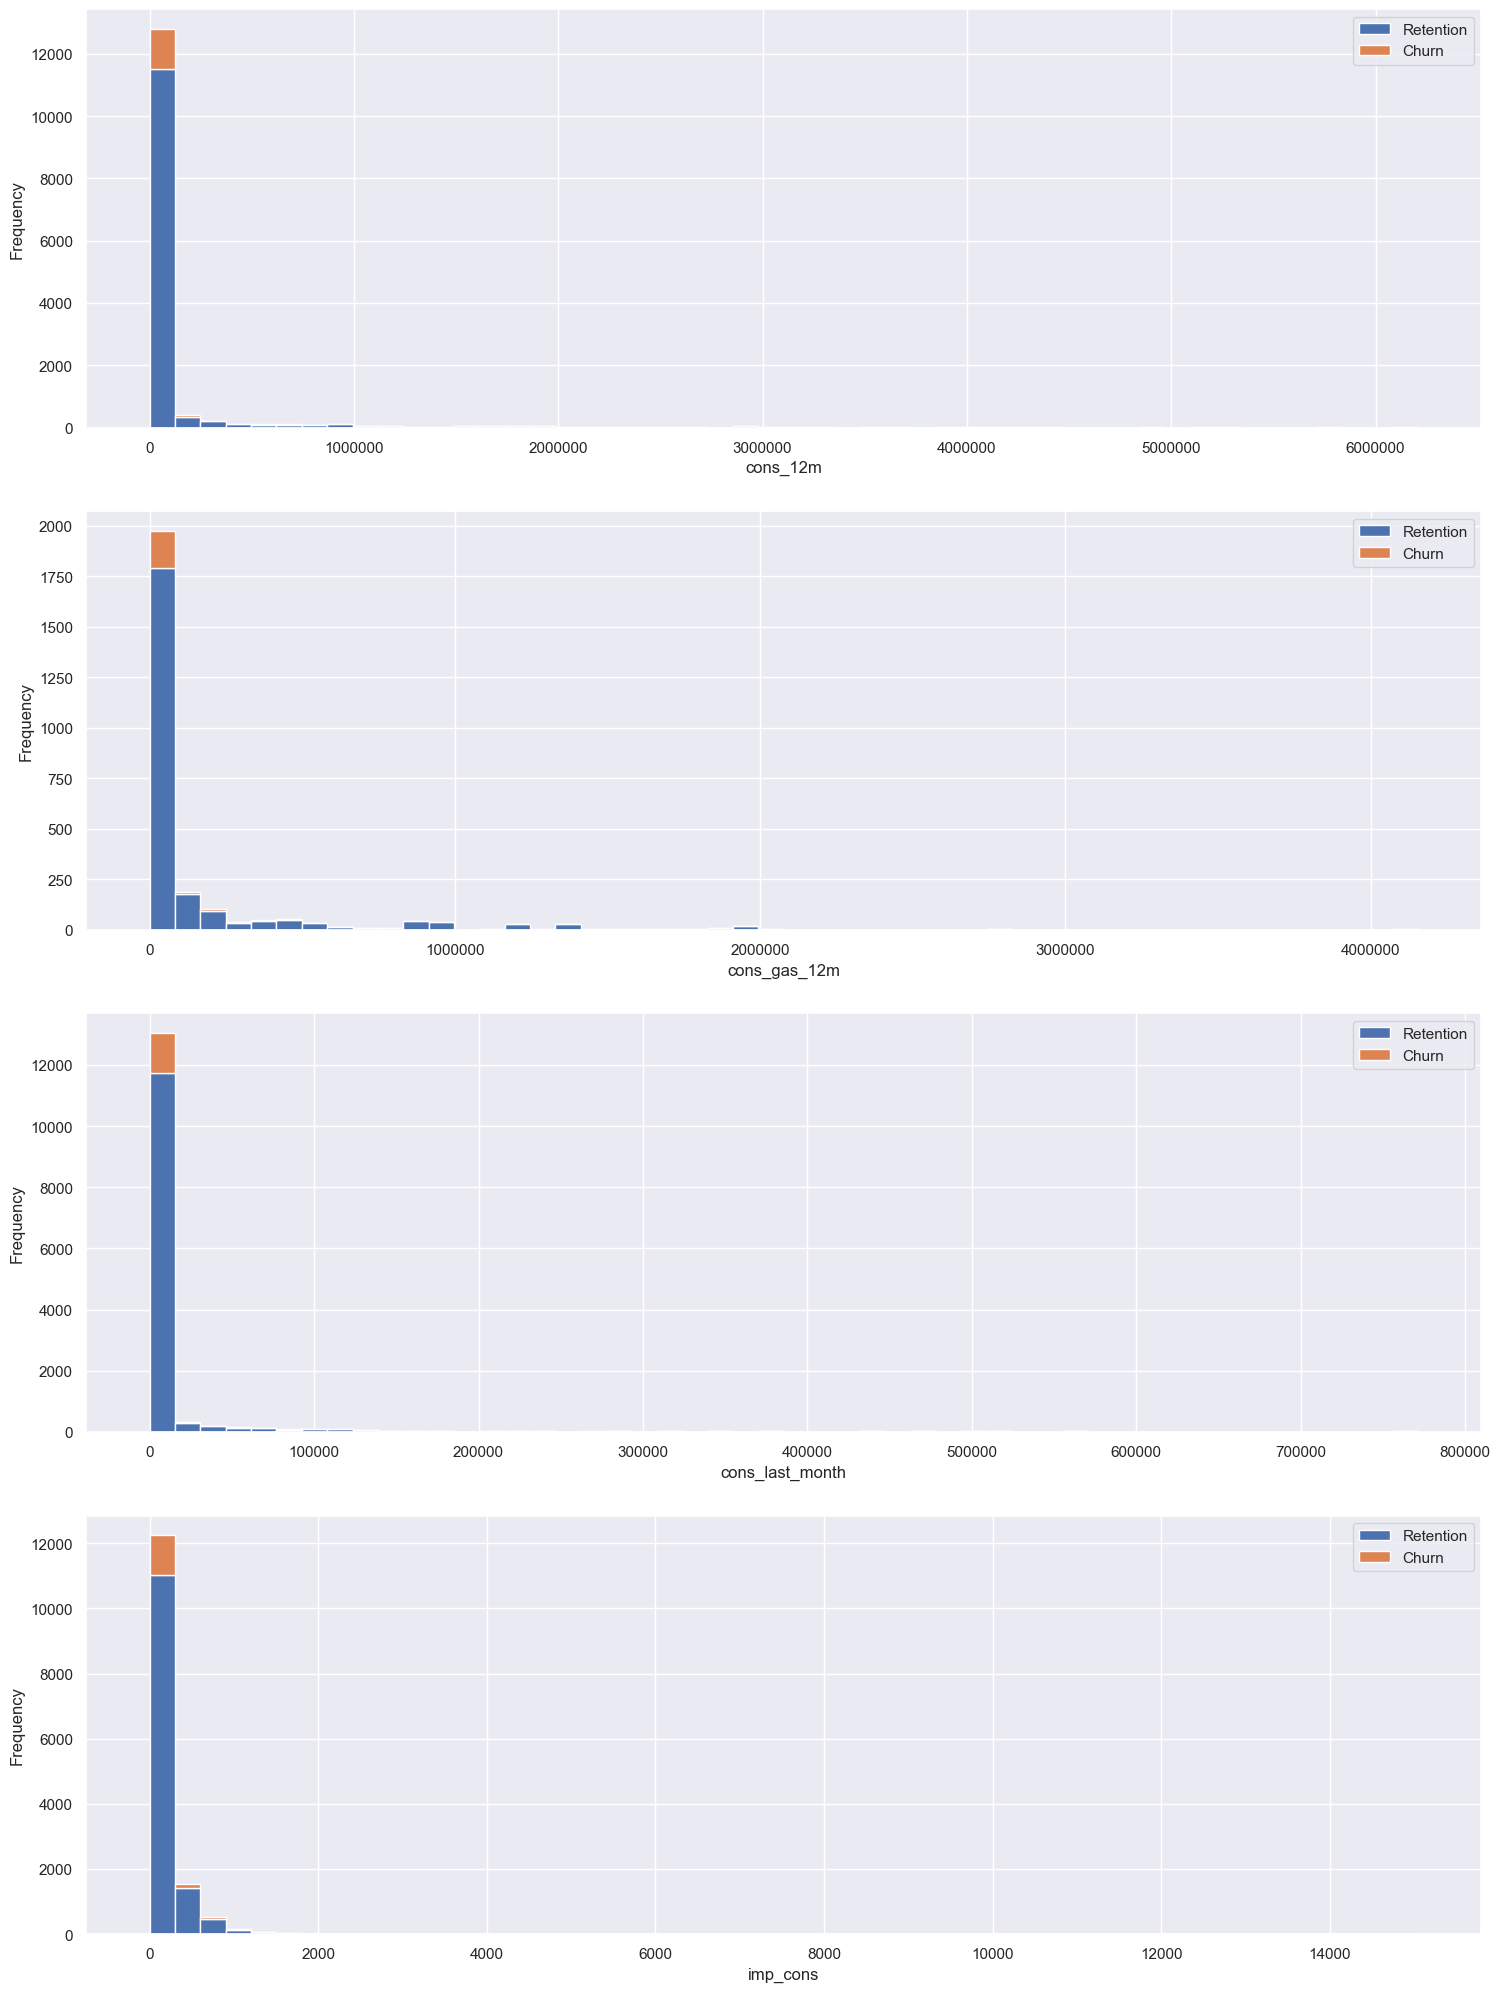

In [21]:
# Define the columns to be plotted
columns_to_plot = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons']

# Create a figure with subplots
fig, axs = plt.subplots(len(columns_to_plot), figsize=(18, 25))

# Define a function to plot a stacked histogram
def plot_stacked_histogram(dataframe, column, ax, bins=50):
    # Create a temporary dataframe with the data to be plotted
    temp_df = pd.DataFrame({
        "Retention": dataframe[dataframe["churn"]==0][column],
        "Churn": dataframe[dataframe["churn"]==1][column]
    })
    # Plot the histogram
    temp_df.plot(kind='hist', bins=bins, stacked=True, ax=ax)
    # Set the x-axis label
    ax.set_xlabel(column)
    # Set the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

# Extract the necessary data
consumption_data = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

# Loop through the columns and plot each one
for i, column in enumerate(columns_to_plot):
    # Filter the data if necessary
    if column == 'cons_gas_12m':
        data_to_plot = consumption_data[consumption_data['has_gas'] == 't']
    else:
        data_to_plot = consumption_data
    # Plot the data
    plot_stacked_histogram(data_to_plot, column, axs[i])

# Show the plot
plt.show()


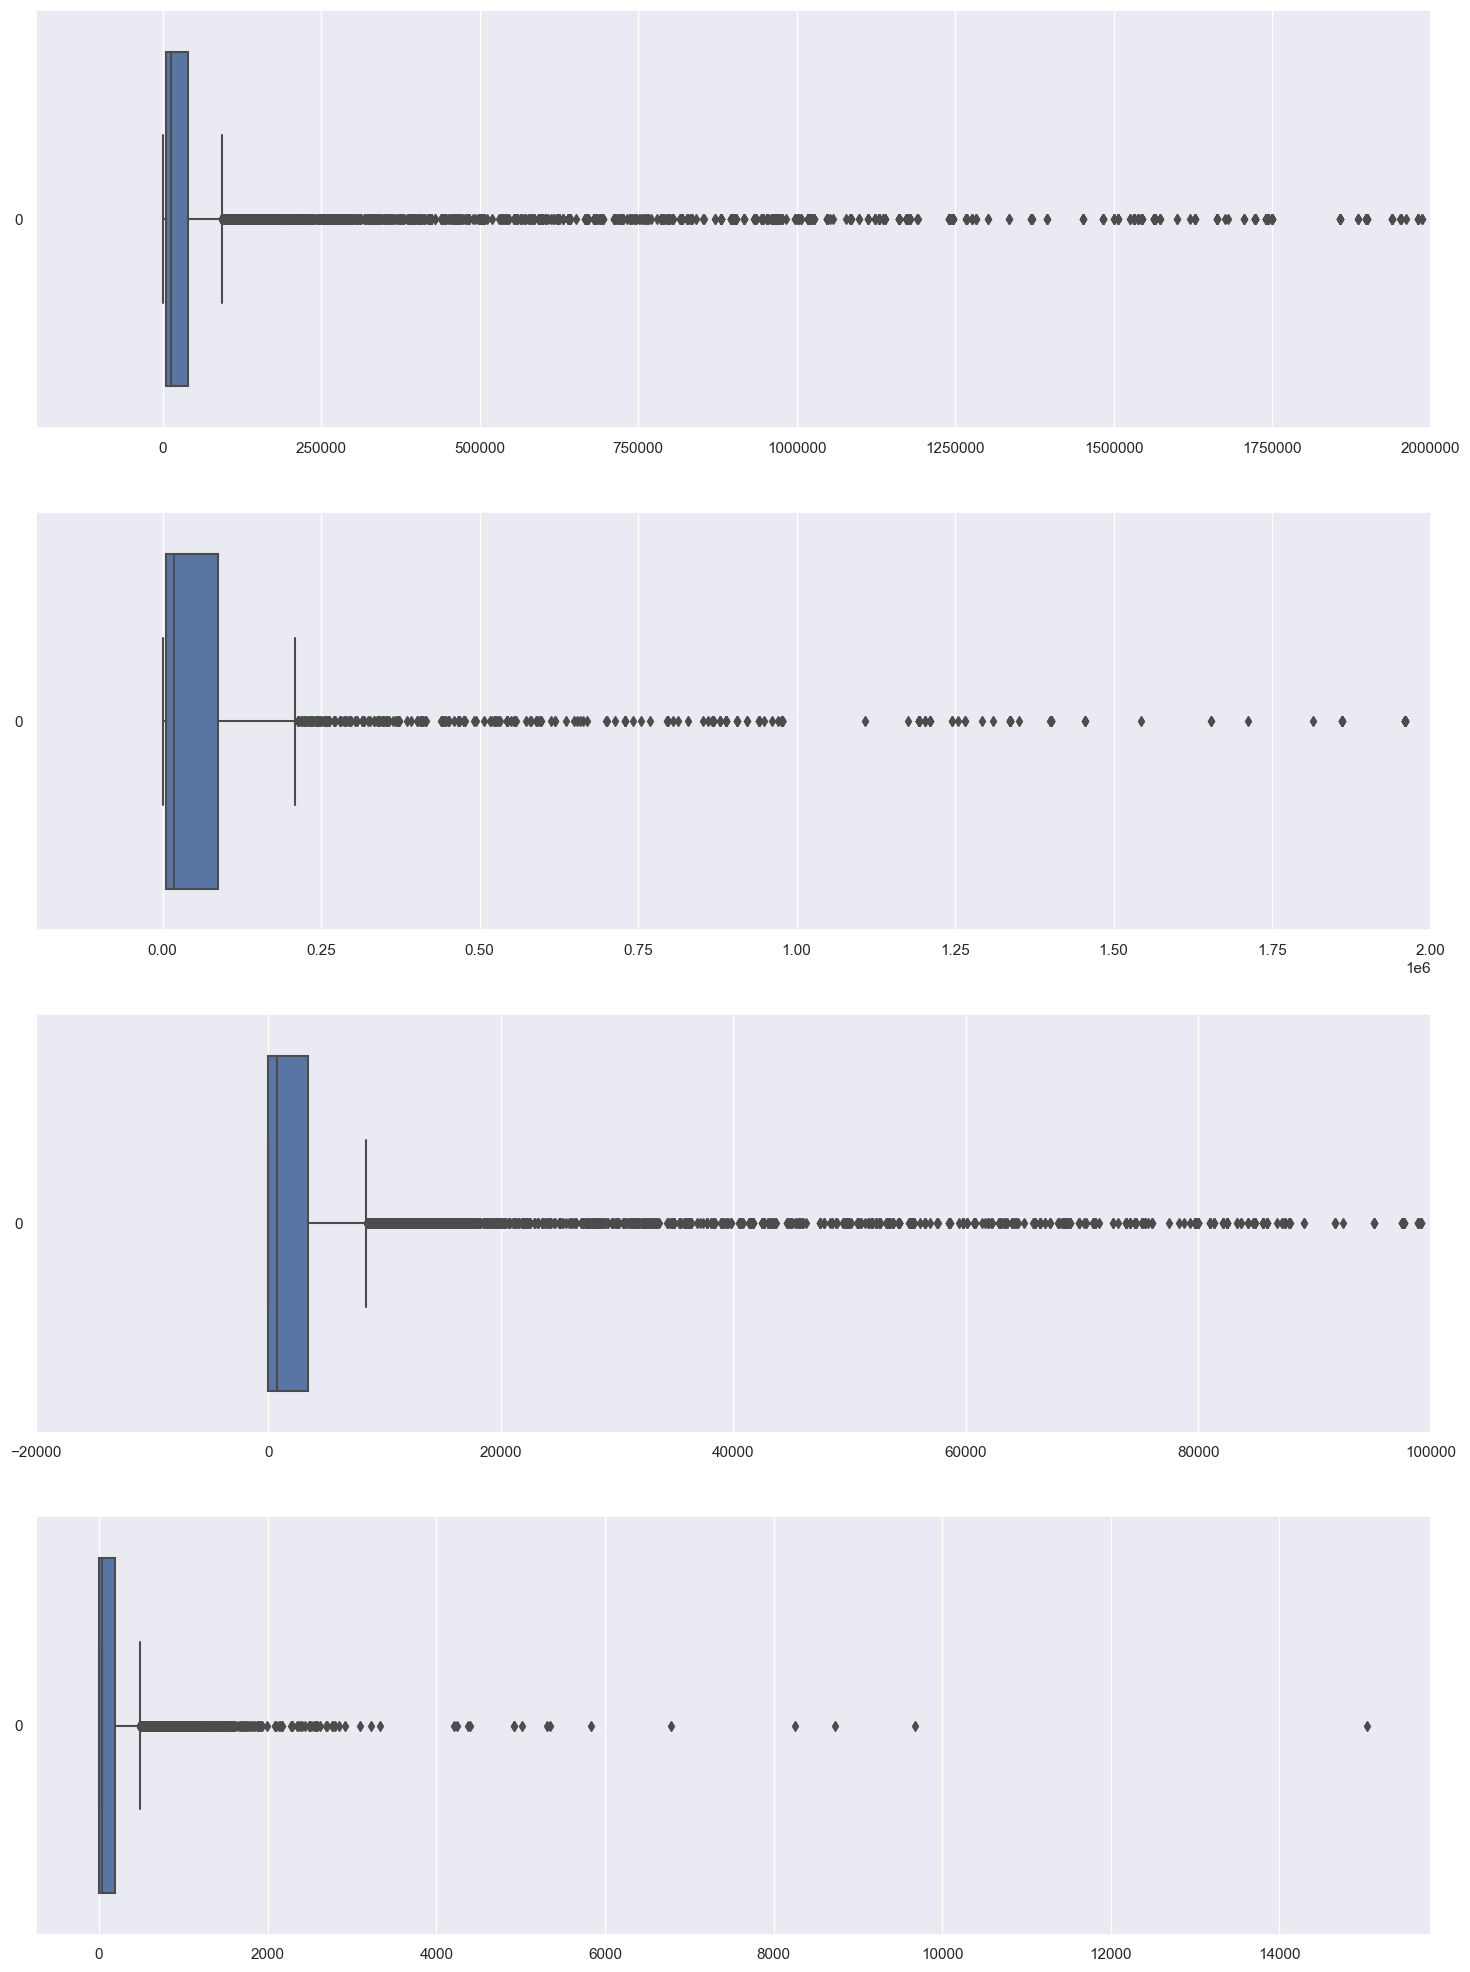

In [22]:
import matplotlib.ticker as ticker  # Import for ScalarFormatter
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Plot histogram
sns.boxplot(consumption_data["cons_12m"], ax=axs[0],orient='h')
sns.boxplot(consumption_data[consumption_data["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1],orient='h')
sns.boxplot(consumption_data["cons_last_month"], ax=axs[2],orient='h')
sns.boxplot(consumption_data["imp_cons"], ax=axs[3],orient='h')

# Remove scientific notation
for ax in axs:
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())  # Set ScalarFormatter
    ax.ticklabel_format(style='plain', axis='x')  # Prevent scientific notation
      # Add x-axis labels
    ax.set_title("")
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

In [23]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [24]:
forecast = client_df[
    ["id", 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak',"churn"
    ]
]

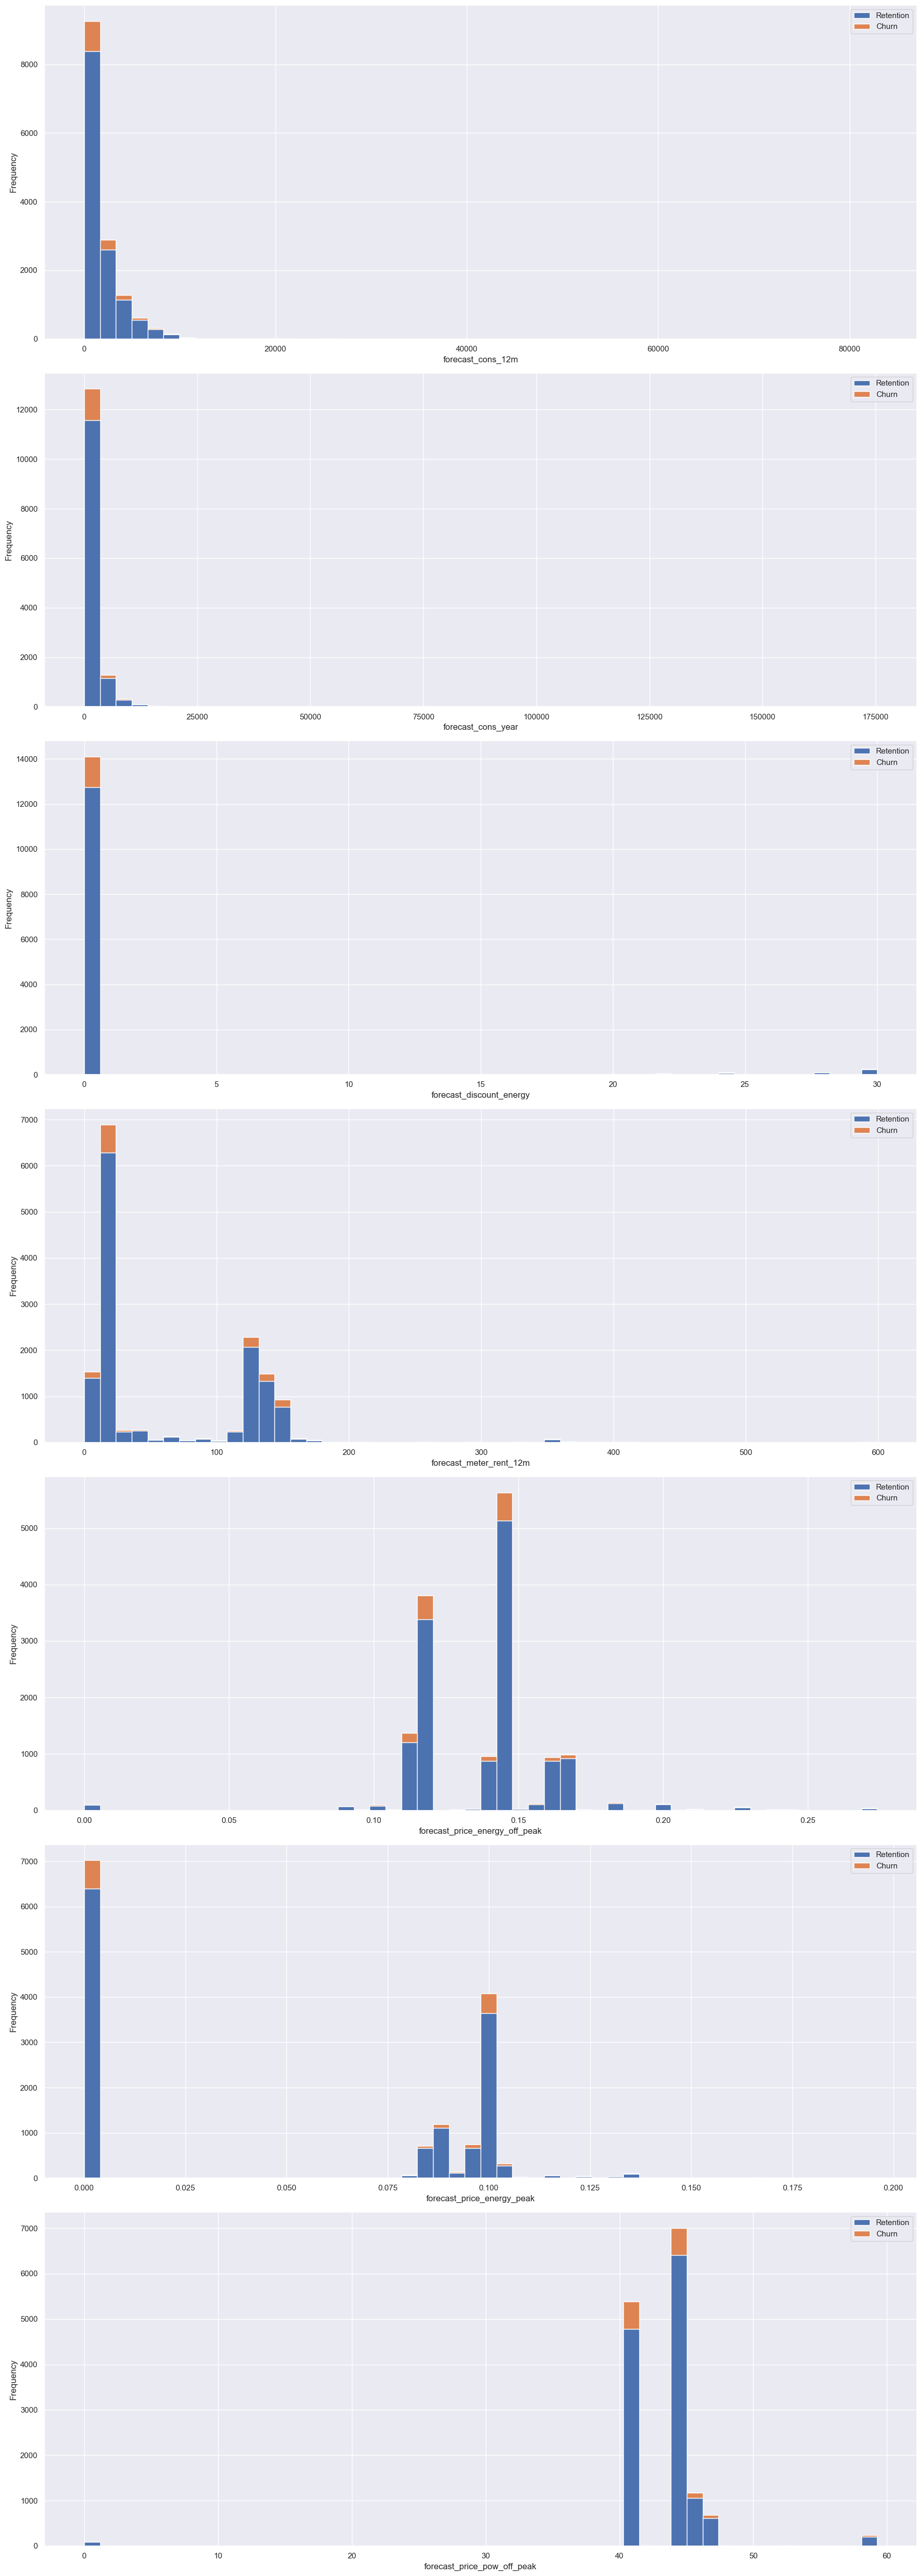

In [25]:


# Define a function to plot a stacked histogram
def plot_stacked_histogram(dataframe, column, ax, bins=50):
    # Create a temporary dataframe with the data to be plotted
    temp_df = pd.DataFrame({
        "Retention": dataframe[dataframe["churn"]==0][column],
        "Churn": dataframe[dataframe["churn"]==1][column]
    })
    # Plot the histogram
    temp_df.plot(kind='hist', bins=bins, stacked=True, ax=ax)
    # Set the x-axis label
    ax.set_xlabel(column)
    # Set the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

# Create a figure with 7 subplots
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histograms
plot_stacked_histogram(forecast, "forecast_cons_12m", axs[0])
plot_stacked_histogram(forecast, "forecast_cons_year", axs[1])
plot_stacked_histogram(forecast, "forecast_discount_energy", axs[2])
plot_stacked_histogram(forecast, "forecast_meter_rent_12m", axs[3])
plot_stacked_histogram(forecast, "forecast_price_energy_off_peak", axs[4])
plot_stacked_histogram(forecast, "forecast_price_energy_peak", axs[5])
plot_stacked_histogram(forecast, "forecast_price_pow_off_peak", axs[6])

# Display the plot
plt.tight_layout()
plt.show()


In [26]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

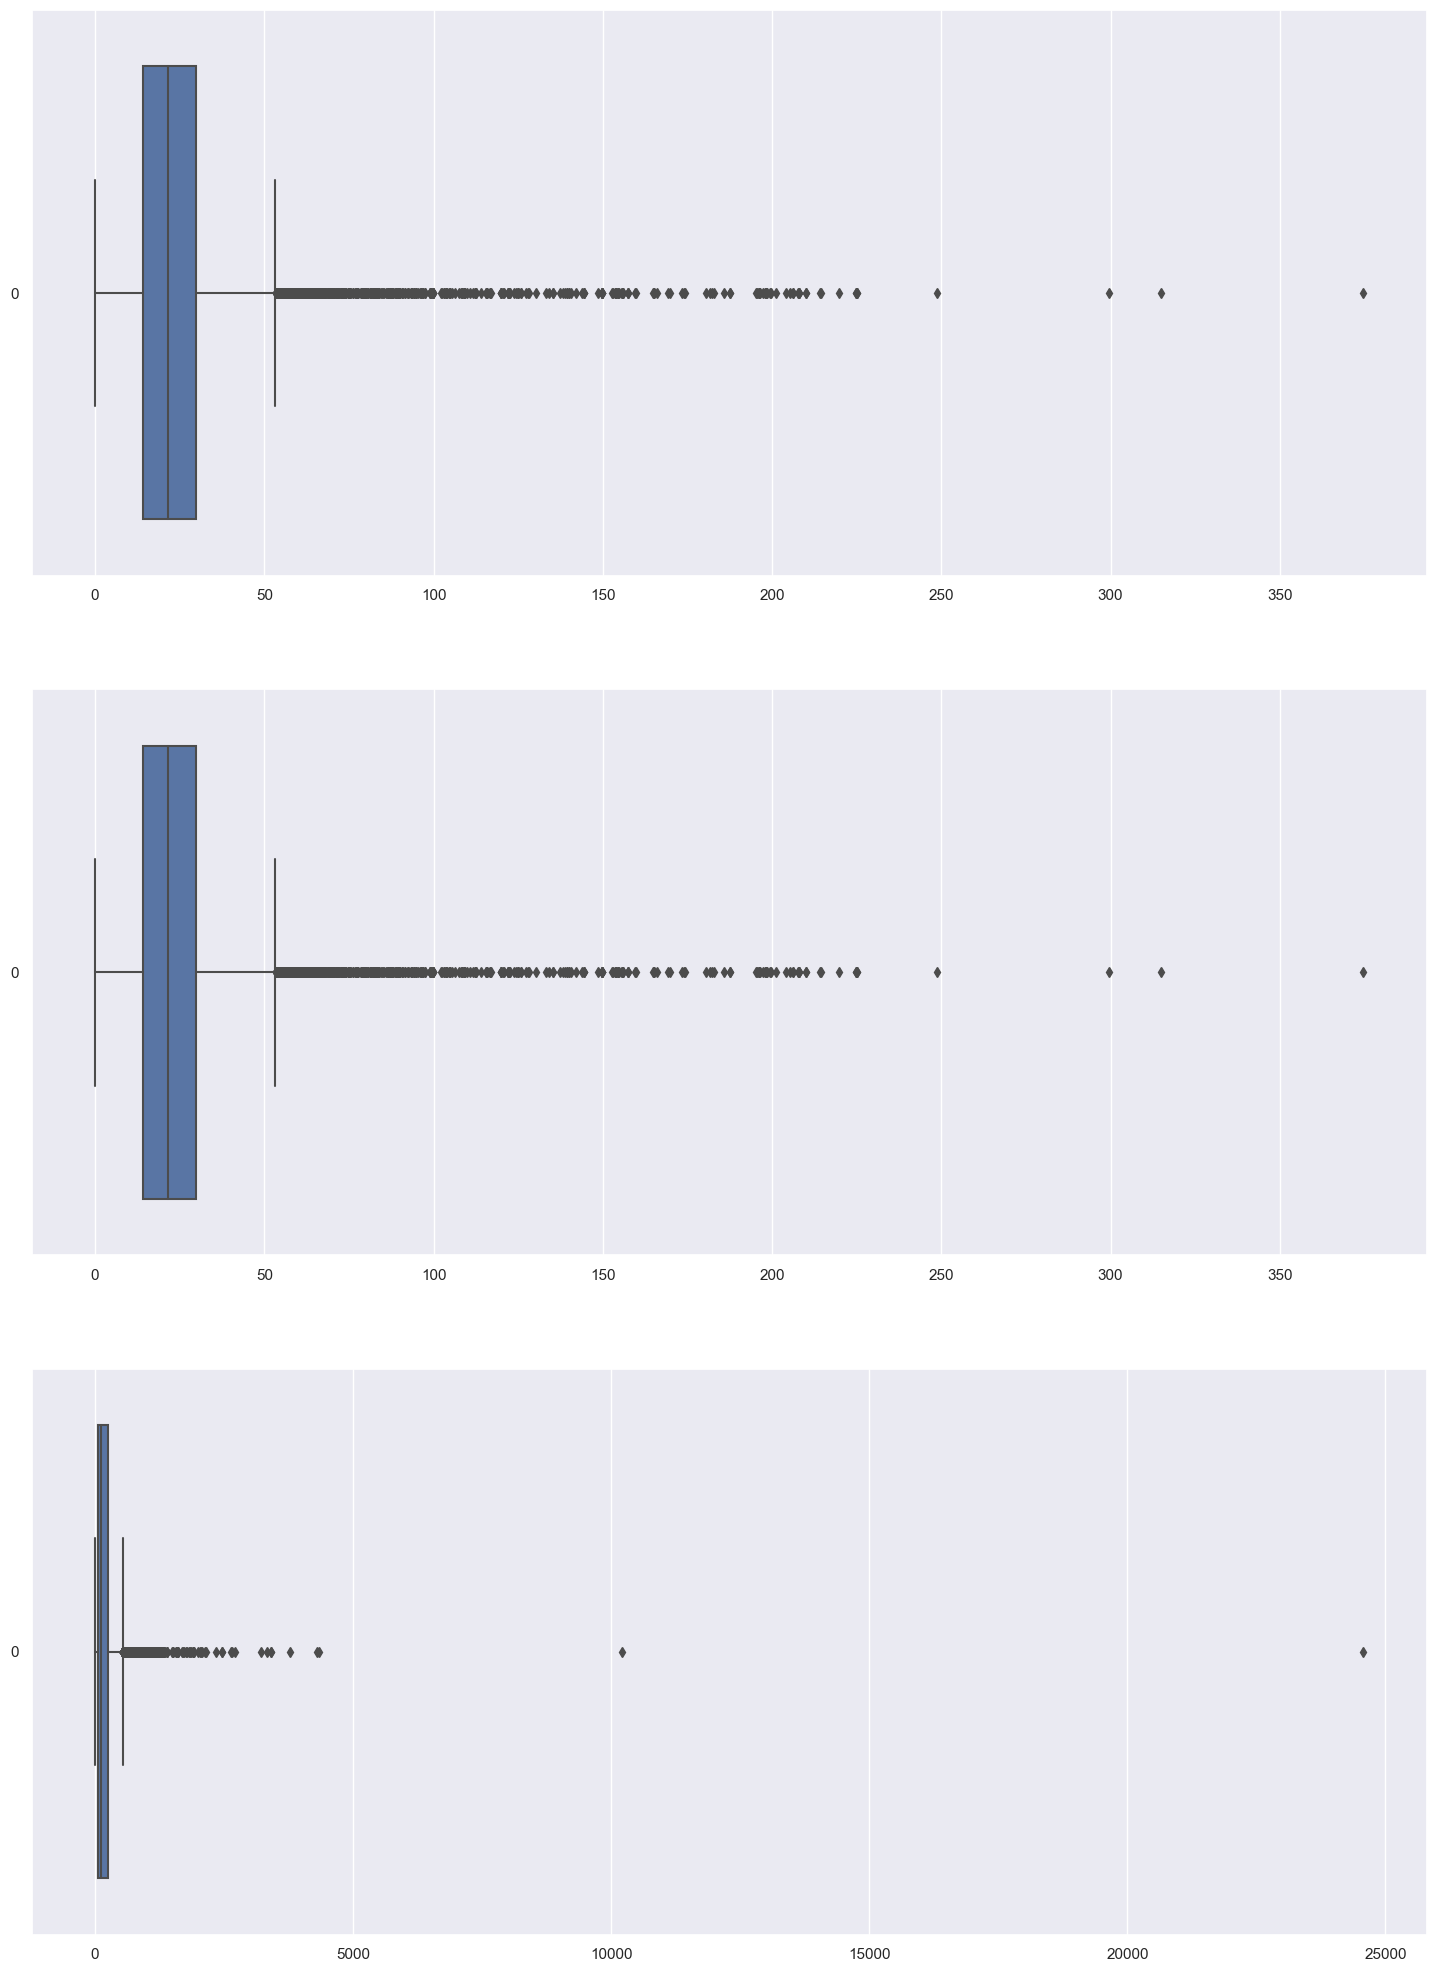

In [27]:
import matplotlib.ticker as ticker  # Import for ScalarFormatter
fig, axs = plt.subplots(nrows=3, figsize=(18,25))

# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0],orient='h')
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1],orient='h')
sns.boxplot(margin["net_margin"], ax=axs[2],orient='h')
# Remove scientific notation
for ax in axs:
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())  # Set ScalarFormatter
    ax.ticklabel_format(style='plain', axis='x')  # Prevent scientific notation
      # Add x-axis labels
    ax.set_title("")
    plt.show()

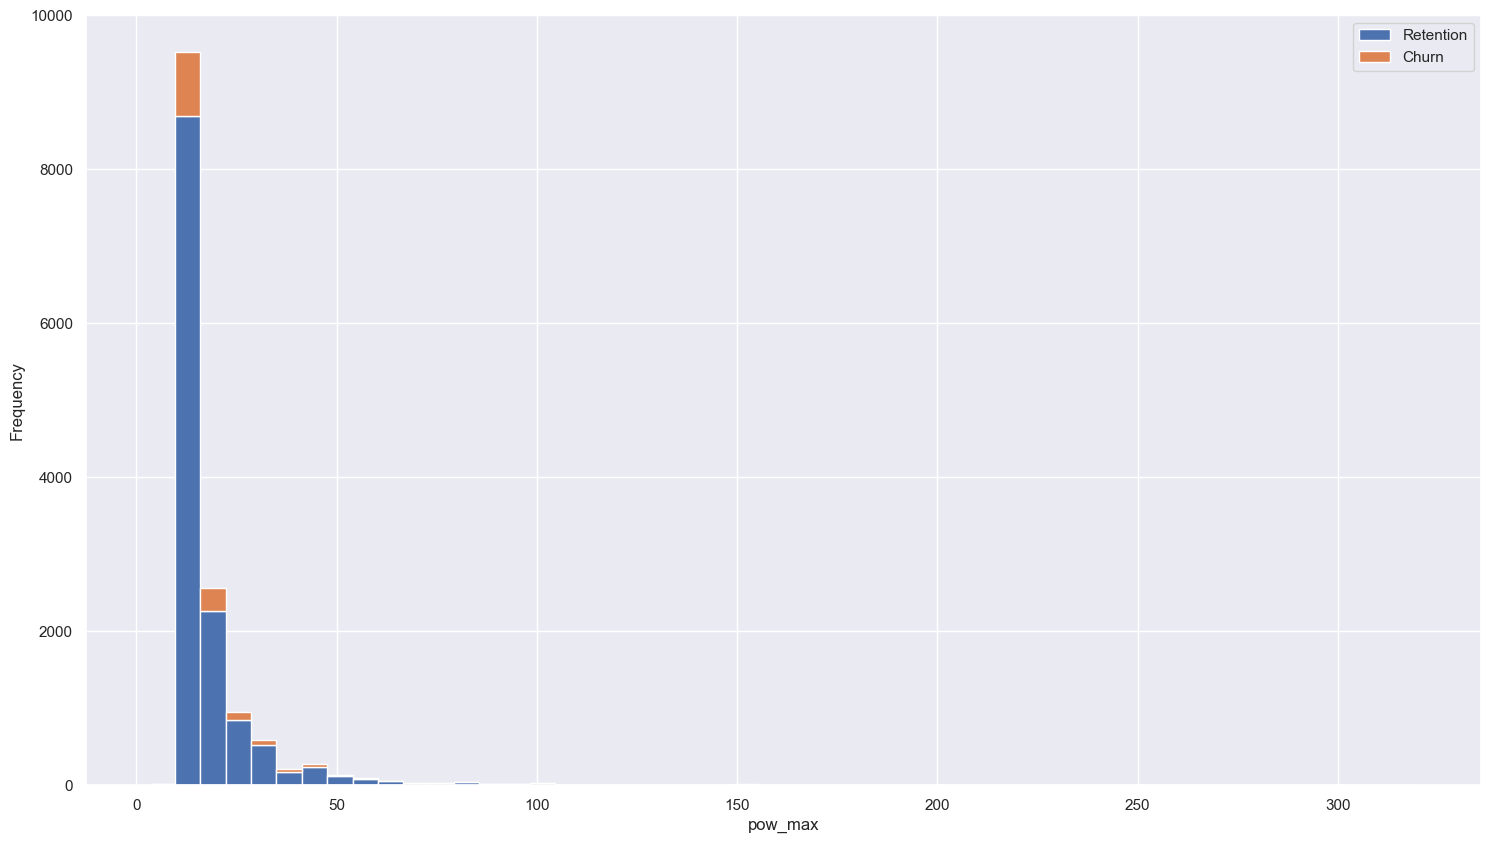

In [28]:
power = client_df[['id', 'pow_max', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 10))

plot_stacked_histogram(power, 'pow_max', axs)

 
 ### Hypothesis investigation
 
 Having explored the data, we'll now examine the potential influence of price sensitivity on churn. First, let's define price sensitivity precisely.

Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure "price sensitivity" using the average of the year, the last 4 months and the last 2 months


In [29]:
# Transform date columns to datetime type
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')


In [30]:
price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [31]:

# Create mean average data
mean_year = price_df.groupby(['id']).mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()


# Comnbine into single dataframe
mean_year = mean_year.rename(
    index=str, 
    columns={
        'price_off_peak_var': "mean_year_price_p1_var",
        'price_peak_var': "mean_year_price_p2_var",
        'price_mid_peak_var': "mean_year_price_p3_var",
         'price_off_peak_fix': "mean_year_price_p1_fix",
        'price_peak_fix': "mean_year_price_p2_fix",
        'price_mid_peak_fix': "mean_year_price_p3_fix"
    }
)

mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]





mean_6m = mean_6m.rename(
    index=str, 
    columns={
        'price_off_peak_var': "mean_6m_price_p1_var",
        'price_peak_var': "mean_6m_price_p2_var",
        'price_mid_peak_var': "mean_6m_price_p3_var",
         'price_off_peak_fix': "mean_6m_price_p1_fix",
        'price_peak_fix': "mean_6m_price_p2_fix",
        'price_mid_peak_fix': "mean_6m_price_p3_fix"
    }
)
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]

mean_3m = mean_3m.rename(
    index=str, 
    columns={
        'price_off_peak_var': "mean_3m_price_p1_var",
        'price_peak_var': "mean_3m_price_p2_var",
        'price_mid_peak_var': "mean_3m_price_p3_var",
         'price_off_peak_fix': "mean_3m_price_p1_fix",
        'price_peak_fix': "mean_3m_price_p2_fix",
        'price_mid_peak_fix': "mean_3m_price_p3_fix"
    }
    
)
mean_3m["mean_3m_price_p1"] = mean_3m["mean_3m_price_p1_var"] + mean_3m["mean_3m_price_p1_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["mean_3m_price_p2_var"] + mean_3m["mean_3m_price_p2_fix"]
mean_3m["mean_3m_price_p3"] = mean_3m["mean_3m_price_p3_var"] + mean_3m["mean_3m_price_p3_fix"]

# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')


In [32]:
price_features


id        price_date_x  \
0      0002203ffbb812588b632b9e628cc38d 2015-06-16 12:00:00   
1      0004351ebdd665e6ee664792efc4fd13 2015-06-16 12:00:00   
2      0010bcc39e42b3c2131ed2ce55246e3c 2015-06-16 12:00:00   
3      0010ee3855fdea87602a5b7aba8e42de 2015-06-16 12:00:00   
4      00114d74e963e47177db89bc70108537 2015-06-16 12:00:00   
...                                 ...                 ...   
16090  ffef185810e44254c3a4c6395e6b4d8a 2015-06-16 12:00:00   
16091  fffac626da707b1b5ab11e8431a4d0a2 2015-06-16 12:00:00   
16092  fffc0cacd305dd51f316424bbb08d1bd 2015-06-16 12:00:00   
16093  fffe4f5646aa39c7f97f95ae2679ce64 2015-06-16 12:00:00   
16094  ffff7fa066f1fb305ae285bb03bf325a 2015-06-16 12:00:00   

       mean_year_price_p1_var  mean_year_price_p2_var  mean_year_price_p3_var  \
0                    0.124338                0.103794                0.073160   
1                    0.146426                0.000000                0.000000   
2                    0.181558                0.000000                0.000000   
3                    0.118757                0.098292                0.069032   
4                    0.147926                0.000000                0.000000   
...                       ...                     ...                     ...   
16090                0.138863                0.115125                0.080780   
16091                0.147137                0.000000                0.000000   
16092                0.153879                0.129497                0.094842   
16093                0.123858                0.103499                0.073735   
16094                0.125360                0.104895                0.075635   

       mean_year_price_p1_fix  mean_year_price_p2_fix  mean_year_price_p3_fix  \
0                   40.701732               24.421038               16.280694   
1                   44.385450                0.000000                0.000000   
2                   45.319710                0.000000                0.000000   
3                   40.647427               24.388455               16.258971   
4                   44.266930                0.000000                0.000000   
...                       ...                     ...                     ...   
16090               40.896427               24.637456               16.507972   
16091               44.311375                0.000000                0.000000   
16092               41.160171               24.895768               16.763569   
16093               40.606699               24.364017               16.242678   
16094               40.647427               24.388455               16.258971   

       mean_year_price_p1  mean_year_price_p2  ...  price_date  \
0               40.826071           24.524832  ...  2015-11-16   
1               44.531877            0.000000  ...  2015-11-16   
2               45.501268            0.000000  ...  2015-11-16   
3               40.766185           24.486748  ...  2015-11-16   
4               44.414856            0.000000  ...  2015-11-16   
...                   ...                 ...  ...         ...   
16090           41.035291           24.752581  ...  2015-11-16   
16091           44.458512            0.000000  ...  2015-11-16   
16092           41.314049           25.025265  ...  2015-11-16   
16093           40.730558           24.467516  ...  2015-11-16   
16094           40.772788           24.493350  ...  2015-11-16   

      mean_3m_price_p1_var  mean_3m_price_p2_var  mean_3m_price_p3_var  \
0                 0.119906              0.101673              0.073719   
1                 0.143943              0.000000              0.000000   
2                 0.201280              0.000000              0.000000   
3                 0.113068              0.095385              0.069409   
4                 0.145440              0.000000              0.000000   
...                    ...                   ...                   ...   
16090             0.112

In [33]:
price_analysis = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_analysis.head()

id        price_date_x  \
0  0002203ffbb812588b632b9e628cc38d 2015-06-16 12:00:00   
1  0004351ebdd665e6ee664792efc4fd13 2015-06-16 12:00:00   
2  0010bcc39e42b3c2131ed2ce55246e3c 2015-06-16 12:00:00   
3  00114d74e963e47177db89bc70108537 2015-06-16 12:00:00   
4  0013f326a839a2f6ad87a1859952d227 2015-06-16 12:00:00   

   mean_year_price_p1_var  mean_year_price_p2_var  mean_year_price_p3_var  \
0                0.124338                0.103794                0.073160   
1                0.146426                0.000000                0.000000   
2                0.181558                0.000000                0.000000   
3                0.147926                0.000000                0.000000   
4                0.126076                0.105542                0.074921   

   mean_year_price_p1_fix  mean_year_price_p2_fix  mean_year_price_p3_fix  \
0               40.701732               24.421038               16.280694   
1               44.385450                0.000000                0.000000   
2               45.319710                0.000000                0.000000   
3               44.266930                0.000000                0.000000   
4               40.728885               24.437330               16.291555   

   mean_year_price_p1  mean_year_price_p2  ...  mean_3m_price_p1_var  \
0           40.826071           24.524832  ...              0.119906   
1           44.531877            0.000000  ...              0.143943   
2           45.501268            0.000000  ...              0.201280   
3           44.414856            0.000000  ...              0.145440   
4           40.854961           24.542872  ...              0.121647   

  mean_3m_price_p2_var  mean_3m_price_p3_var  mean_3m_price_p1_fix  \
0             0.101673              0.073719             40.728885   
1             0.000000              0.000000             44.444710   
2             0.000000              0.000000             45.944710   
3             0.000000              0.000000             44.266930   
4             0.103413              0.075460             40.728885   

   mean_3m_price_p2_fix  mean_3m_price_p3_fix  mean_3m_price_p1  \
0              24.43733             16.291555         40.848791   
1               0.00000              0.000000         44.588653   
2               0.00000              0.000000         46.145990   
3               0.00000              0.000000         44.412370   
4              24.43733             16.291555         40.850532   

   mean_3m_price_p2  mean_3m_price_p3  churn  
0         24.539003         16.365274      0  
1          0.000000          0.000000      0  
2          0.000000          0.000000      0  
3          0.000000          0.000000      0  
4         24.540743         16.367015      0  

[5 rows x 32 columns]

In [34]:
price_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      14605 non-null  object        
 1   price_date_x            14605 non-null  datetime64[ns]
 2   mean_year_price_p1_var  14605 non-null  float64       
 3   mean_year_price_p2_var  14605 non-null  float64       
 4   mean_year_price_p3_var  14605 non-null  float64       
 5   mean_year_price_p1_fix  14605 non-null  float64       
 6   mean_year_price_p2_fix  14605 non-null  float64       
 7   mean_year_price_p3_fix  14605 non-null  float64       
 8   mean_year_price_p1      14605 non-null  float64       
 9   mean_year_price_p2      14605 non-null  float64       
 10  mean_year_price_p3      14605 non-null  float64       
 11  price_date_y            14605 non-null  datetime64[ns]
 12  mean_6m_price_p1_var    14605 non-null  float6

In [35]:
price=price_analysis.drop(columns="id")

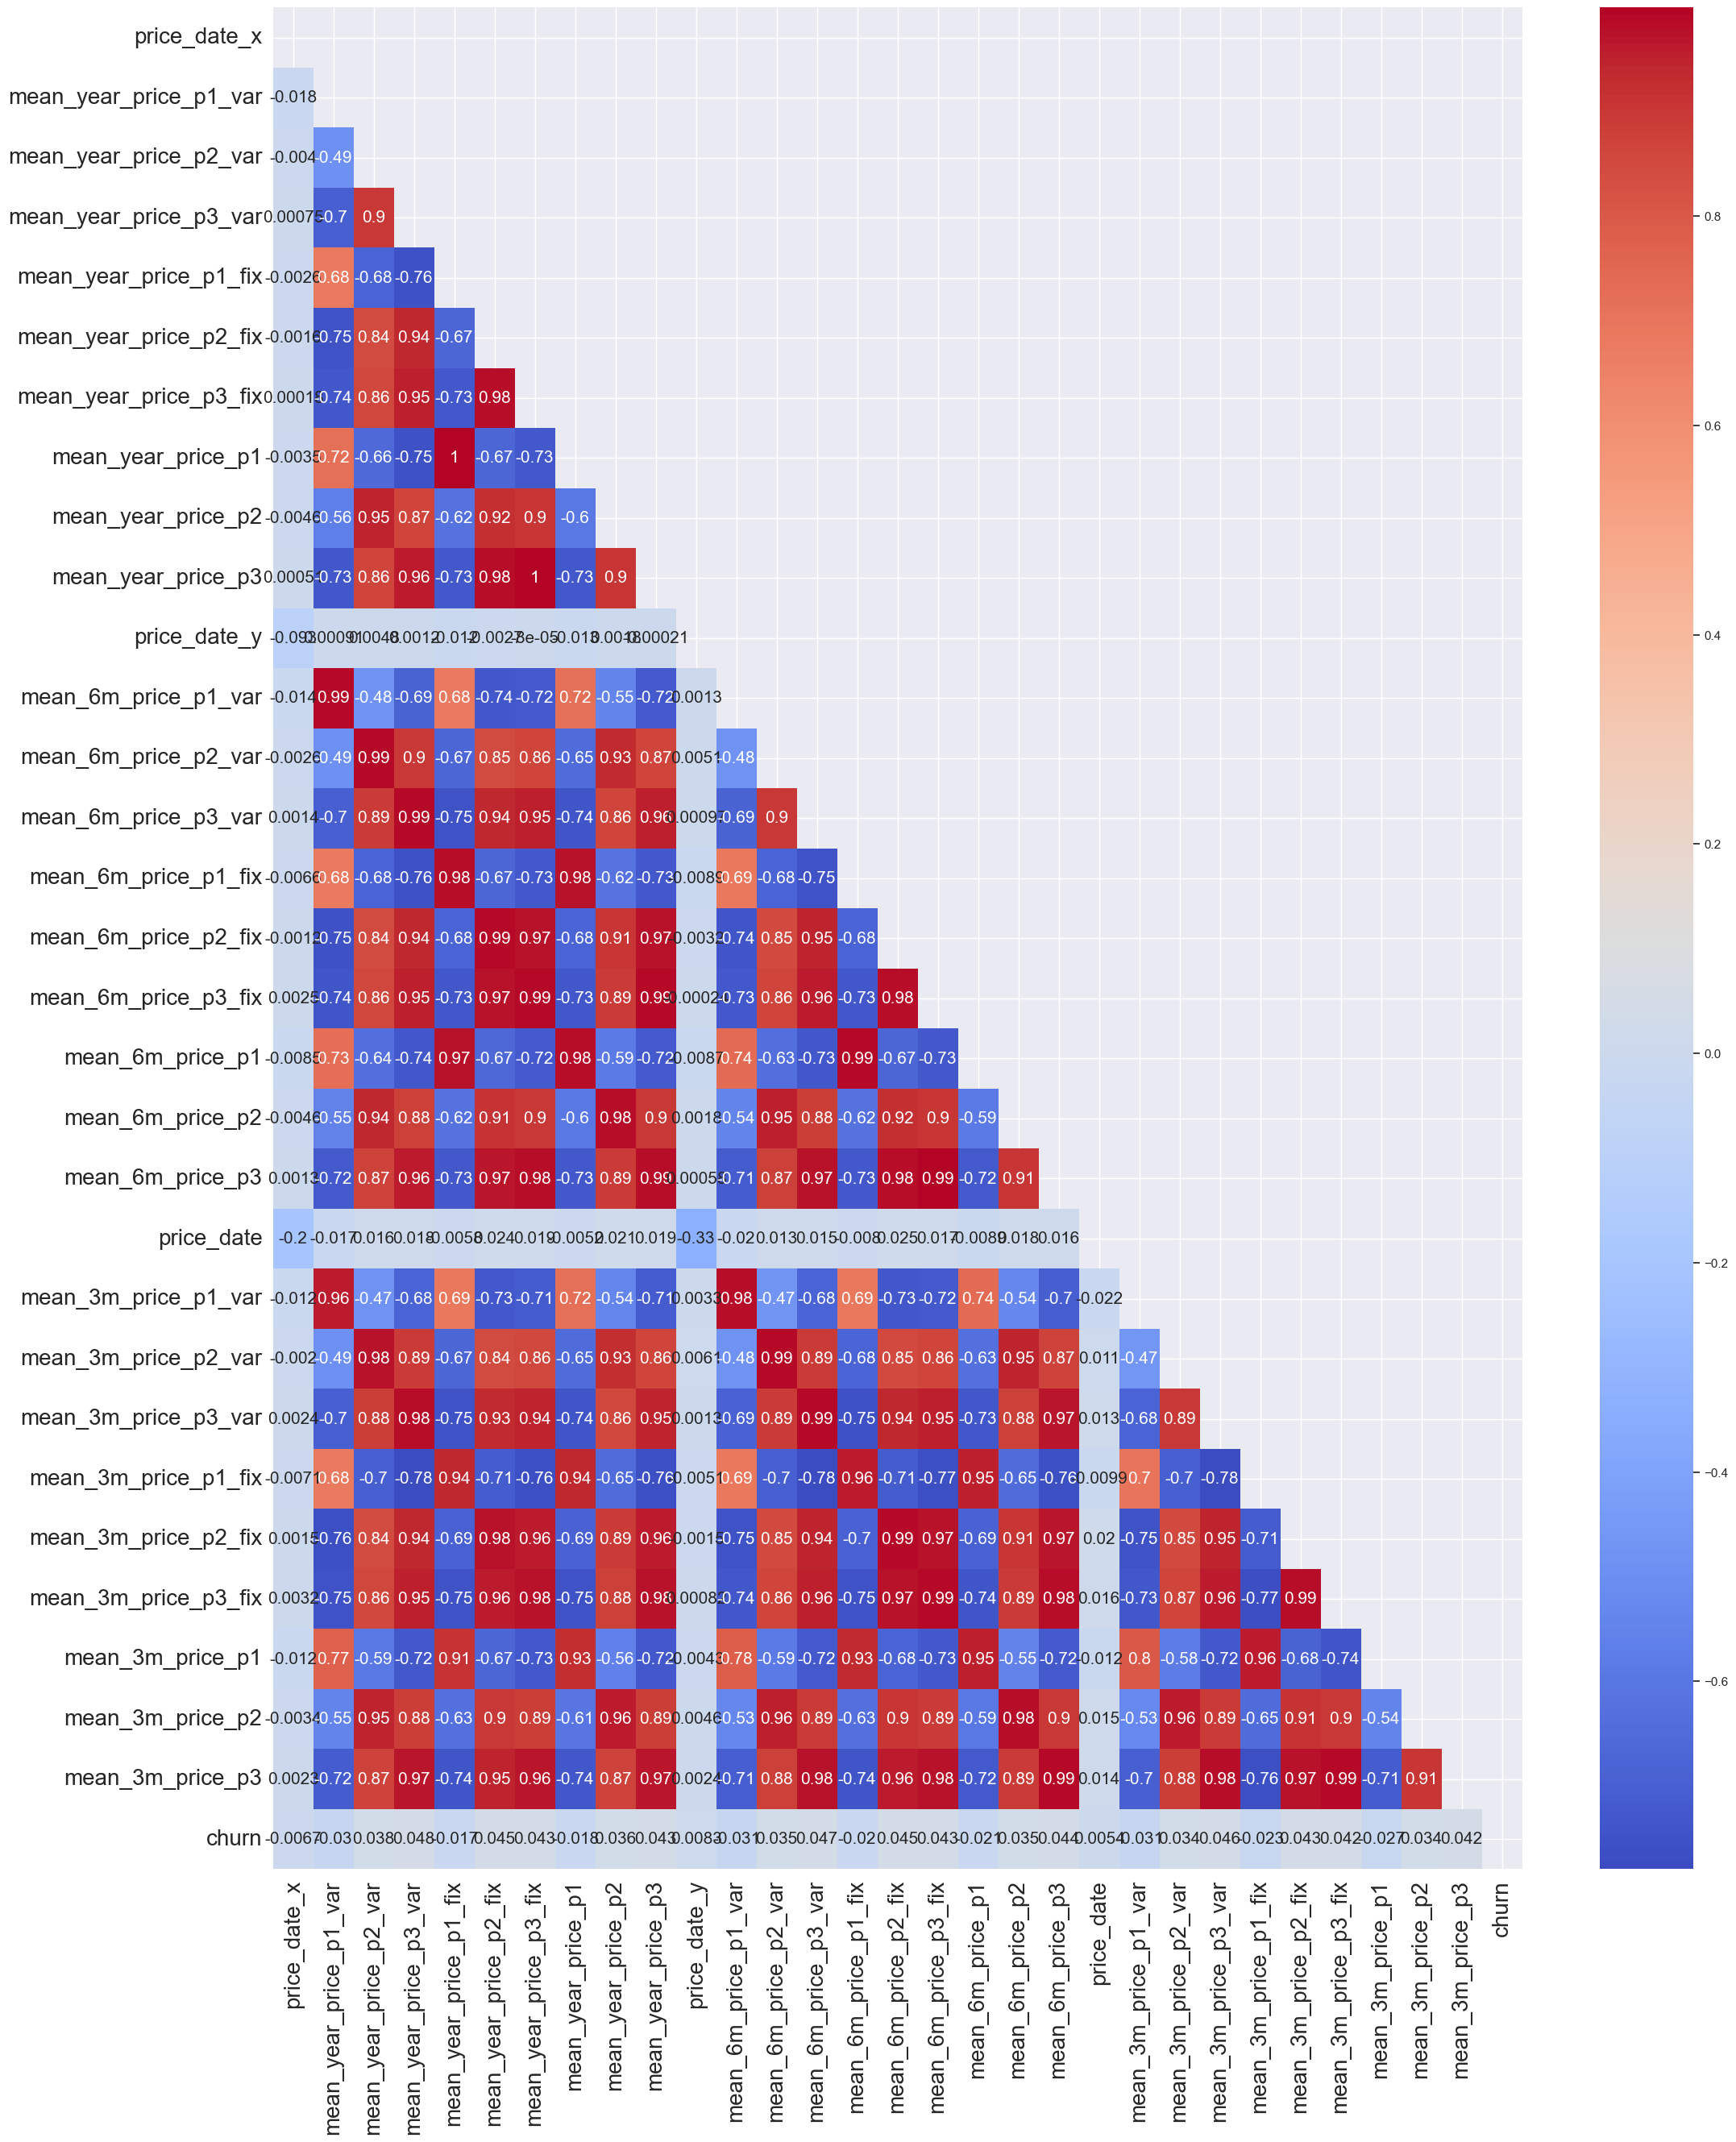

In [36]:
# Calculate the Spearman correlation
matrix = np.triu(price.corr(method='spearman'))


# Create the heatmap
plt.figure(figsize=(25,30))
sns.heatmap(price.corr(method='spearman'), annot=True, mask=matrix, cmap='coolwarm',annot_kws={"size": 15})
plt.xticks(size=20)  # Change the size of the x-axis tick labels
plt.yticks(size=20)
plt.show()


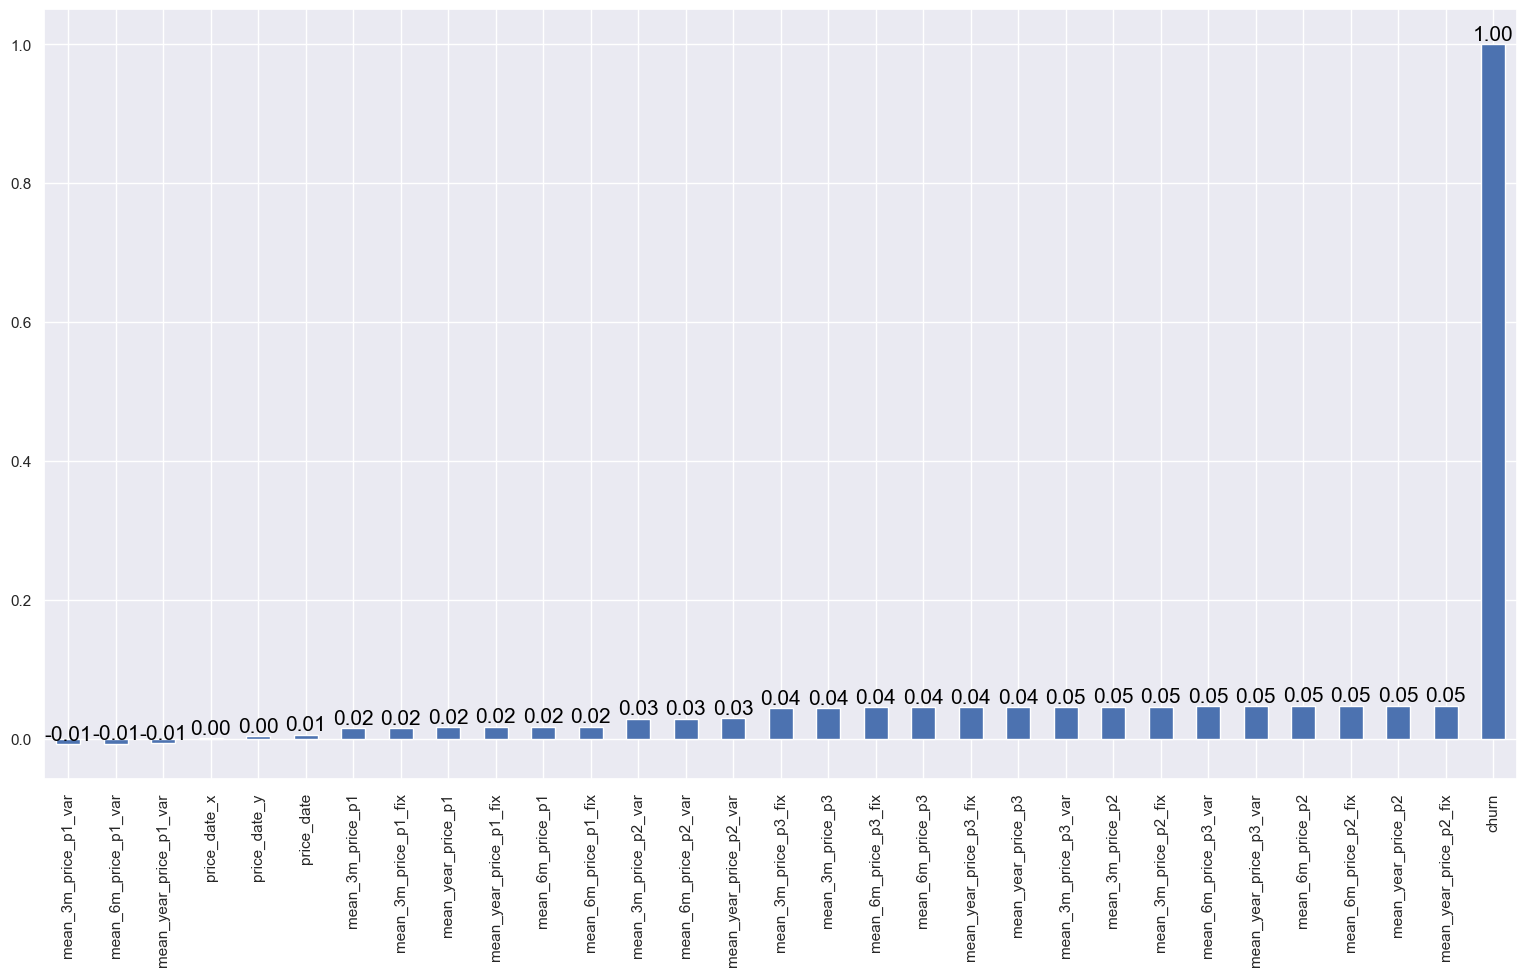

In [37]:
plt.figure(figsize=(19,10))
ax = price.corr()["churn"].sort_values(ascending=True).plot(kind="bar")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', color='black', size=15)
plt.show()


In [38]:
merged_data = pd.merge(client_df.drop(columns=['churn']), price_analysis, on='id')

In [39]:
merged_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  mean_3m_price_p1_var  \
0      2015-11-01   2015-06-23               0.00  ...              0.131756   
1      2009-08-21   2015-08-31             189.95  ...              0.147600   
2      2010-04-16   2015-04-17              47.96  ...              0.167798   
3      2010-03-30   2015-03-31             240.04  ...              0.148586   
4      2010-01-13   2015-03-09             445.75  ...              0.119906   

   mean_3m_price_p2_var  mean_3m_price_p3_var  mean_3m_price_p1_fix  \
0              0.092638              0.036909             42.497907   
1              0.000000              0.000000             44.444710   
2              0.088409              0.000000             44.444710   
3              0.000000              0.000000             44.444710   
4              0.101673              0.073719             40.728885   

   mean_3m_price_p2_fix  mean_3m_price_p3_fix mean_3m_price_p1  \
0             12.218665              8.145777        42.629663   
1              0.000000              0.000000        44.592310   
2              0.000000              0.000000        44.612508   
3              0.000000              0.000000        44.593296   
4             24.437330             16.291555        40.848791   

   mean_3m_price_p2  mean_3m_price_p3  churn  
0         12.311304          8.182687      1  
1          0.000000          0.000000      0  
2          0.088409          0.000000      0  
3          0.000000          0.000000      0  
4         24.539003         16.365274      0  

[5 rows x 56 columns]

In [40]:
df=merged_data.copy()
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with predictive power.

In [41]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [42]:
df = pd.merge(df, diff, on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  mean_3m_price_p3_var  \
0      2015-11-01   2015-06-23               0.00  ...              0.036909   
1      2009-08-21   2015-08-31             189.95  ...              0.000000   
2      2010-04-16   2015-04-17              47.96  ...              0.000000   
3      2010-03-30   2015-03-31             240.04  ...              0.000000   
4      2010-01-13   2015-03-09             445.75  ...              0.073719   

   mean_3m_price_p1_fix  mean_3m_price_p2_fix  mean_3m_price_p3_fix  \
0             42.497907             12.218665              8.145777   
1             44.444710              0.000000              0.000000   
2             44.444710              0.000000              0.000000   
3             44.444710              0.000000              0.000000   
4             40.728885             24.437330             16.291555   

   mean_3m_price_p1  mean_3m_price_p2 mean_3m_price_p3  churn  \
0         42.629663         12.311304         8.182687      1   
1         44.592310          0.000000         0.000000      0   
2         44.612508          0.088409         0.000000      0   
3         44.593296          0.000000         0.000000      0   
4         40.848791         24.539003        16.365274      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                         0.020057                        3.700961  
1                        -0.003767                        0.177779  
2                        -0.004670                        0.177779  
3                        -0.004547                        0.177779  
4                        -0.006192                        0.162916  

[5 rows x 58 columns]

In [43]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [44]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [45]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  mean_3m_price_p3  \
0      2015-11-01   2015-06-23               0.00  ...          8.182687   
1      2009-08-21   2015-08-31             189.95  ...          0.000000   
2      2010-04-16   2015-04-17              47.96  ...          0.000000   
3      2010-03-30   2015-03-31             240.04  ...          0.000000   
4      2010-01-13   2015-03-09             445.75  ...         16.365274   

   churn  offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0      1                         0.020057                        3.700961   
1      0                        -0.003767                        0.177779   
2      0                        -0.004670                        0.177779   
3      0                        -0.004547                        0.177779   
4      0                        -0.006192                        0.162916   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   
2                     0.082090                     0.088421   
3                     0.151210                     0.000000   
4                     0.020536                     0.030773   

  off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                        0.058257                    18.590255   
1                        0.149609                    44.311375   
2                        0.170512                    44.385450   
3                        0.151210                    44.400265   
4                        0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                     7.450670                        26.040925  
1                     0.000000                        44.311375  
2                     0.000000                        44.385450  
3                     0.000000                        44.400265  
4                     8.137629                        24.412893  

[5 rows x 64 columns]

In [46]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [47]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
2       0.176471
3       0.143987
4       0.127473
13      0.095238
5       0.091999
12      0.083333
7       0.075472
6       0.075407
11      0.059783
8       0.047244
10      0.045455
9       0.012500

In [48]:
def calculate_months(reference_date, dataframe, column_name):
    """
    This function takes a reference date, a dataframe, and a column name.
    It calculates the time difference in months between the reference date and the dates in the specified column.
    """
    difference_in_time = reference_date - dataframe[column_name]
    months_difference = (difference_in_time / np.timedelta64(1, 'M')).astype(int)
    
    return months_difference


In [49]:
from datetime import datetime
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = calculate_months(reference_date, df, 'date_activ')
df['months_to_end'] = -calculate_months(reference_date, df, 'date_end')
df['months_modif_prod'] = calculate_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] =calculate_months(reference_date, df, 'date_renewal')

In [50]:
df

id                     channel_sales  \
0      24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1      d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3      bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4      149d57cf92fc41cf94415803a877cb4b                           MISSING   
...                                 ...                               ...   
14600  18463073fb097fc0ac5d3e040f356987  foosdfpfkusacimwkcsosbicdxkicaua   
14601  d0a6f71671571ed83b2645d23af6de00  foosdfpfkusacimwkcsosbicdxkicaua   
14602  10e6828ddd62cbcf687cb74928c4c2d2  foosdfpfkusacimwkcsosbicdxkicaua   
14603  1cf20fd6206d7678d5bcafd28c53b4db  foosdfpfkusacimwkcsosbicdxkicaua   
14604  563dde550fd624d7352f3de77c0cdfcd                           MISSING   

       cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0             0         54946                0 2013-06-15 2016-06-15   
1          4660             0                0 2009-08-21 2016-08-30   
2           544             0                0 2010-04-16 2016-04-16   
3          1584             0                0 2010-03-30 2016-03-30   
4          4425             0              526 2010-01-13 2016-03-07   
...         ...           ...              ...        ...        ...   
14600     32270         47940                0 2012-05-24 2016-05-08   
14601      7223             0              181 2012-08-27 2016-08-27   
14602      1844             0              179 2012-02-08 2016-02-07   
14603       131             0                0 2012-08-30 2016-08-30   
14604      8730             0                0 2009-12-18 2016-12-17   

      date_modif_prod date_renewal  forecast_cons_12m  ...  \
0          2015-11-01   2015-06-23               0.00  ...   
1          2009-08-21   2015-08-31             189.95  ...   
2          2010-04-16   2015-04-17              47.96  ...   
3          2010-03-30   2015-03-31             240.04  ...   
4          2010-01-13   2015-03-09             445.75  ...   
...               ...          ...                ...  ...   
14600      2015-05-08   2014-05-26            4648.01  ...   
14601      2012-08-27   2015-08-28             631.69  ...   
14602      2012-02-08   2015-02-09             190.39  ...   
14603      2012-08-30   2015-08-31              19.34  ...   
14604      2009-12-18   2015-12-21             762.41  ...   

       peak_mid_peak_var_mean_diff  off_peak_mid_peak_var_mean_diff  \
0                         0.034219                         0.058257   
1                         0.007124                         0.149609   
2                         0.088421                         0.170512   
3                         0.000000                         0.151210   
4                         0.030773                         0.051309   
...                            ...                              ...   
14600                     0.000000                         0.144124   
14601                     0.024589                         0.035982   
14602                     0.030633                         0.051178   
14603                     0.007124                         0.149609   
14604                     0.087344                         0.168662   

       off_peak_peak_fix_mean_diff  peak_mid_peak_fix_mean_diff  \
0                        18.590255                     7.450670   
1                        44.311375                     0.000000   
2                        44.385450                     0.000000   
3                        44.400265                     0.000000   
4                        16.275263                     8.137629   
...                            ...                          ...   
14600                    44.370635                     0.000000   
14601                    22.622294                    28.047961   
14602                    16.280694            

In [51]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_mean_diff  \
0                        0.114481  ...                     0.034219   
1                        0.145711  ...                     0.007124   
2                        0.165794  ...                     0.088421   
3                        0.146694  ...                     0.000000   
4                        0.116900  ...                     0.030773   

   off_peak_mid_peak_var_mean_diff off_peak_peak_fix_mean_diff  \
0                         0.058257                   18.590255   
1                         0.149609                   44.311375   
2                         0.170512                   44.385450   
3                         0.151210                   44.400265   
4                         0.051309                   16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  tenure  \
0                     7.450670                        26.040925       3   
1                     0.000000                        44.311375       7   
2                     0.000000                        44.385450       6   
3                     0.000000                        44.400265       6   
4                     8.137629                        24.412893       6   

   months_activ  months_to_end  months_modif_prod months_renewal  
0            30              5                  1              6  
1            74              7                 74              3  
2            67              3                 67              8  
3            67              2                 67              8  
4            70              2                 70              9  

[5 rows x 65 columns]

In [52]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081887

In [53]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [54]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  tenure  months_activ  months_to_end  \
0                    0.098142  ...       3            30              5   
1                    0.000000  ...       7            74              7   
2                    0.087899  ...       6            67              3   
3                    0.000000  ...       6            67              2   
4                    0.100015  ...       6            70              2   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  1               6            False   
1                 74               3             True   
2                 67               8            False   
3                 67               8            False   
4                 70               9             True   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                     False  
1                                     False  
2                                     False  
3                                     False  
4                                     False  

[5 rows x 69 columns]

In [55]:
df["channel_foosdfpfkusacimwkcsosbicdxkicaua"]=df["channel_foosdfpfkusacimwkcsosbicdxkicaua"].astype(int)
df["channel_MISSING"]=df["channel_MISSING"].astype(int)
df["channel_lmkebamcaaclubfxadlmueccxoimlema"]=df["channel_lmkebamcaaclubfxadlmueccxoimlema"].astype(int)
df["channel_usilxuppasemubllopkaafesmlibmsdf"]=df["channel_usilxuppasemubllopkaafesmlibmsdf"].astype(int)
df["channel_ewpakwlliwisiwduibdlfmalxowmwpci"]=df["channel_ewpakwlliwisiwduibdlfmalxowmwpci"].astype(int)


In [56]:
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  tenure  months_activ  months_to_end  \
0                    0.098142  ...       3            30              5   
1                    0.000000  ...       7            74              7   
2                    0.087899  ...       6            67              3   
3                    0.000000  ...       6            67              2   
4                    0.100015  ...       6            70              2   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  1               6                0   
1                 74               3                1   
2                 67               8                0   
3                 67               8                0   
4                 70               9                1   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 69 columns]

In [57]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [58]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df["origin_up_lxidpiddsbxsbosboudacockeimpuepw"]=df["origin_up_lxidpiddsbxsbosboudacockeimpuepw"].astype(int)
df["origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws"]=df["origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws"].astype(int)
df["origin_up_ldkssxwpmemidmecebumciepifcamkci"]=df["origin_up_ldkssxwpmemidmecebumciepifcamkci"].astype(int)
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...                  1               6   
1                    0.000000  ...                 74               3   
2                    0.087899  ...                 67               8   
3                    0.000000  ...                 67               8   
4                    0.100015  ...                 70               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

  origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                          1  
1                                          0  
2                                          0  
3                                          0  
4                                          0  

[5 rows x 71 columns]

In [59]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460500e+04  1.460500e+04     14605.000000       14605.000000   
mean   1.592303e+05  2.809108e+04     16091.371448        1868.638618   
std    5.734836e+05  1.629786e+05     64366.262314        2387.651549   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674000e+03  0.000000e+00         0.000000         494.980000   
50%    1.411600e+04  0.000000e+00       793.000000        1112.610000   
75%    4.076400e+04  0.000000e+00      3383.000000        2402.270000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean          1399.858747                  0.966450                63.090448   
std           3247.876793                  5.108355                66.166636   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.800000   
75%           1746.000000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

In [60]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [61]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14605.000000  14605.000000     14605.000000       14605.000000   
mean       4.223945      0.778978         2.264801           2.962162   
std        0.884545      1.716828         1.769266           0.683612   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.753966      0.000000         0.000000           2.695464   
50%        4.149742      0.000000         2.899821           3.046733   
75%        4.610287      0.000000         3.529430           3.380803   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean             1.784733                  0.966450                 1.517233   
std              1.584972                  5.108355                 0.571489   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296665   
75%              3.242293                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

In [62]:
df2= df.drop(columns=['id'])

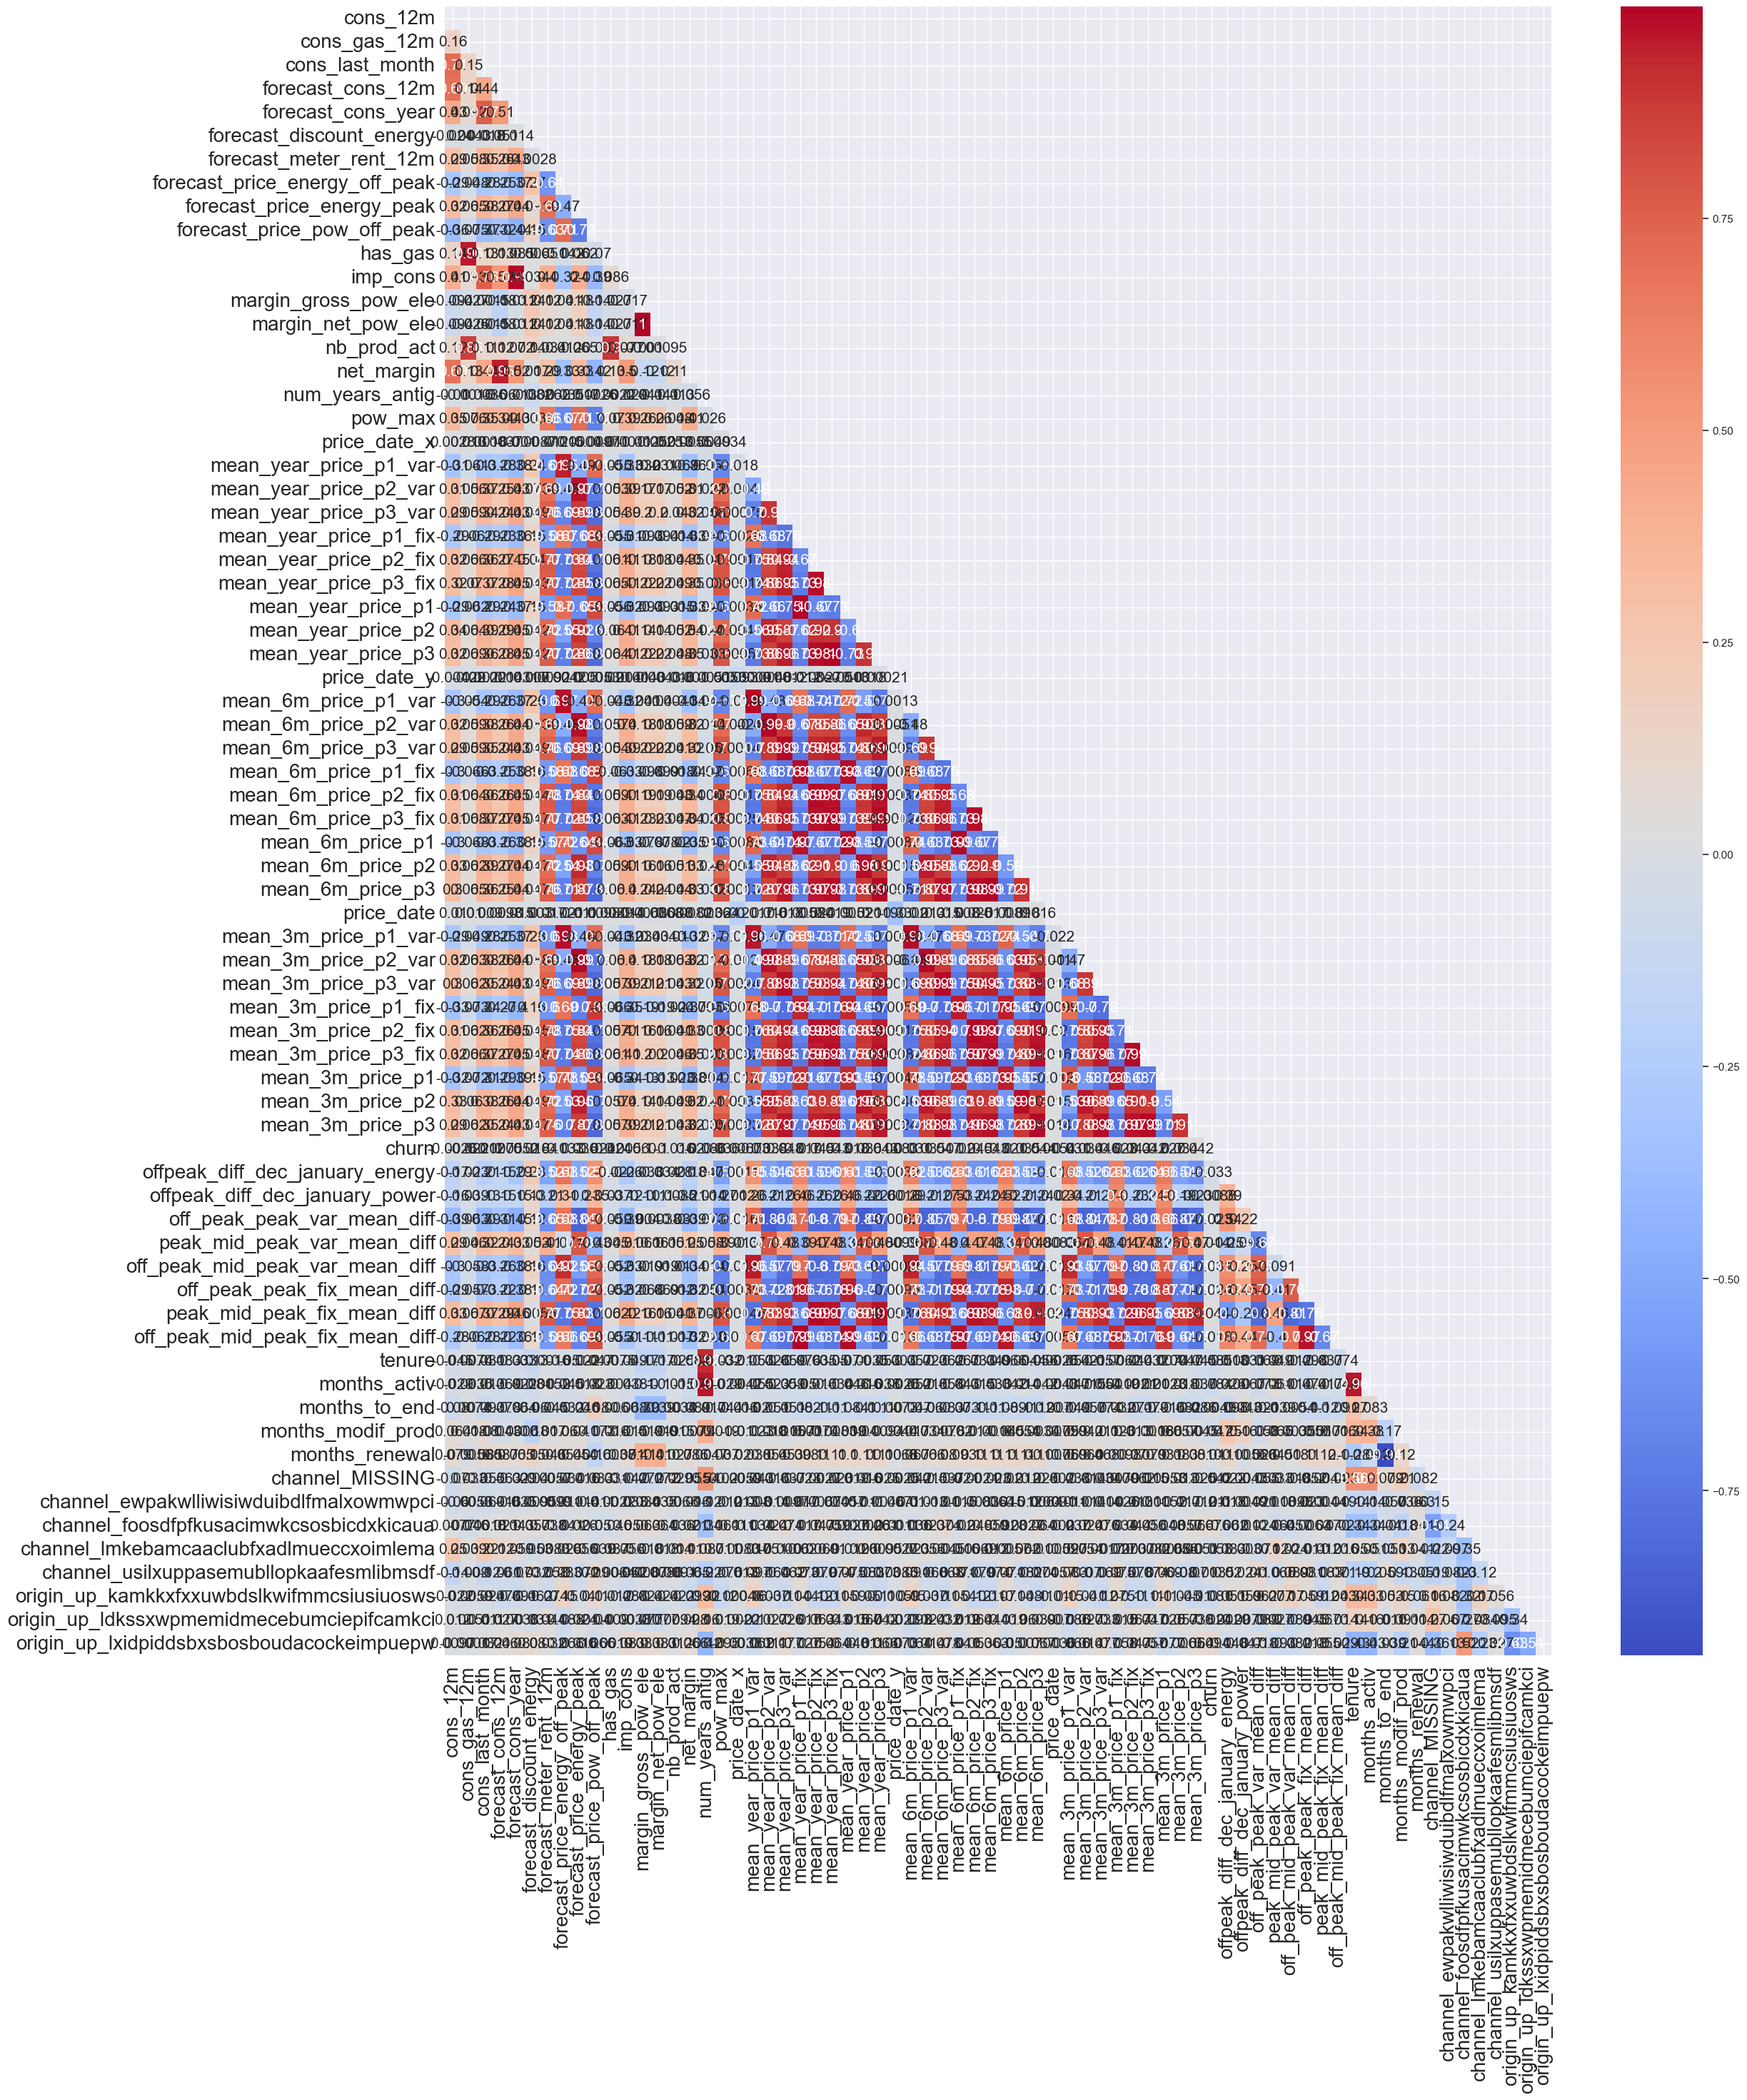

In [63]:
# Calculate the Spearman correlation
matrix = np.triu(df2.corr(method='spearman'))


# Create the heatmap
plt.figure(figsize=(25,30))
sns.heatmap(df2.corr(method='spearman'), annot=True, mask=matrix, cmap='coolwarm',annot_kws={"size": 15})
plt.xticks(size=20)  # Change the size of the x-axis tick labels
plt.yticks(size=20)
plt.show()


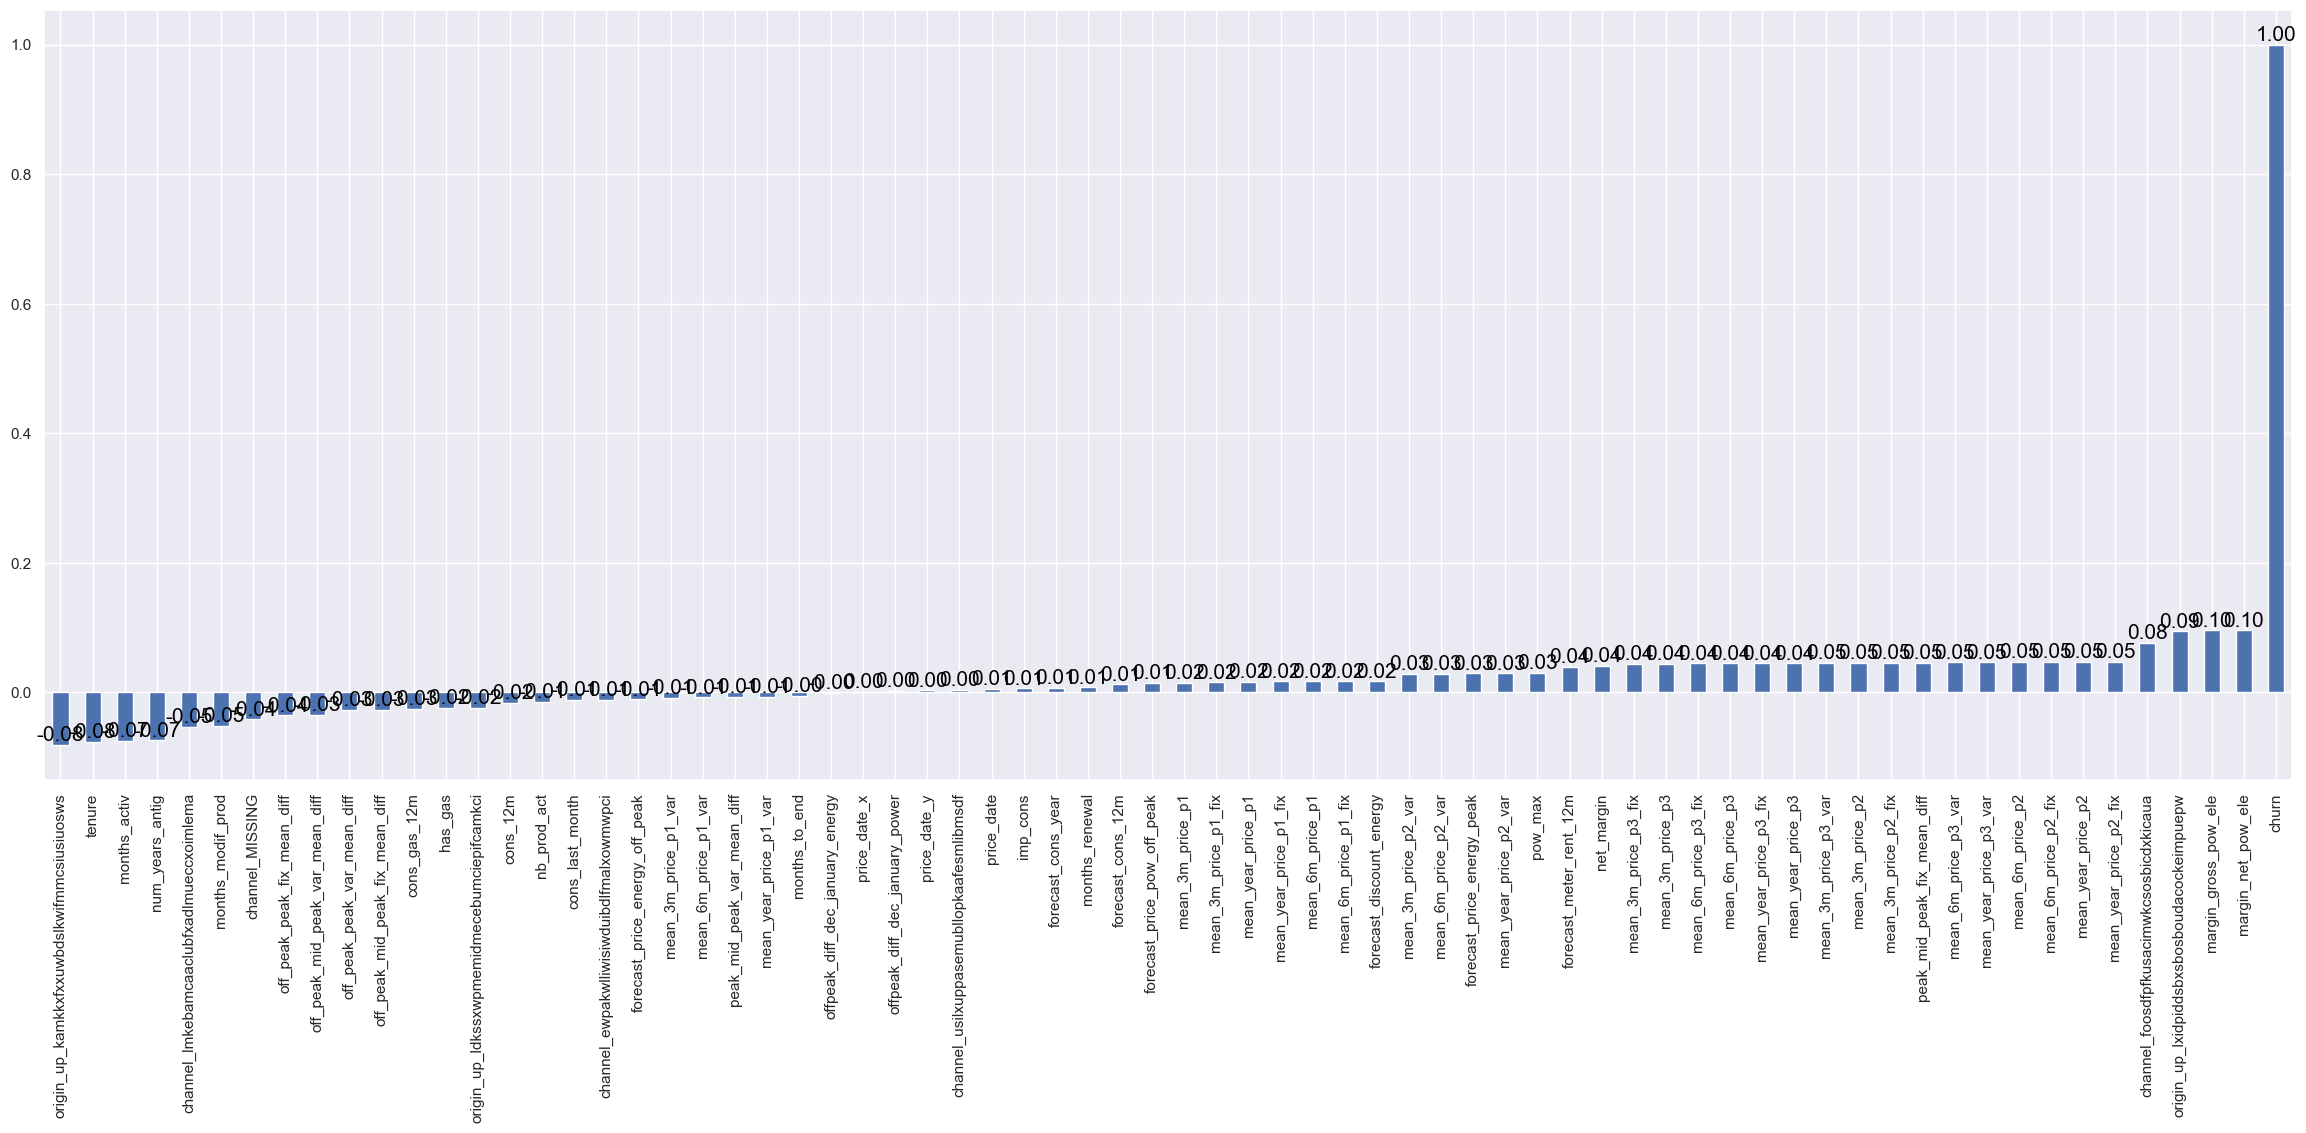

In [64]:
plt.figure(figsize=(29,10))
ax = df2.corr()["churn"].sort_values(ascending=True).plot(kind="bar")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', color='black', size=15)
plt.show()


In [65]:


def select_features_by_correlation(data, target_variable, threshold=0.3):
    """
    Select features based on correlation with the target variable.

    Parameters:
    - data: DataFrame, the input dataset
    - target_variable: str, the target variable column name
    - threshold: float, the absolute correlation threshold
    
    Returns:
    - selected_features: list, names of selected features
    """

    # Calculate correlation matrix
    correlation_matrix = data.corr()

    # Extract absolute correlation values with the target variable
    target_correlation = correlation_matrix[target_variable].abs()

    # Select features above the threshold
    selected_features = target_correlation[target_correlation > threshold].index.tolist()

    return selected_features

# Example Usage:
# Assuming 'your_data' is your DataFrame and 'your_target_variable' is the target variable column name
selected_features = select_features_by_correlation(df2, 'churn', 0.04)
print("Selected Features:", selected_features)


Selected Features: ['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'num_years_antig', 'mean_year_price_p3_var', 'mean_year_price_p2_fix', 'mean_year_price_p3_fix', 'mean_year_price_p2', 'mean_year_price_p3', 'mean_6m_price_p3_var', 'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix', 'mean_6m_price_p2', 'mean_6m_price_p3', 'mean_3m_price_p3_var', 'mean_3m_price_p2_fix', 'mean_3m_price_p3_fix', 'mean_3m_price_p2', 'mean_3m_price_p3', 'churn', 'peak_mid_peak_fix_mean_diff', 'tenure', 'months_activ', 'months_modif_prod', 'channel_MISSING', 'channel_foosdfpfkusacimwkcsosbicdxkicaua', 'channel_lmkebamcaaclubfxadlmueccxoimlema', 'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws', 'origin_up_lxidpiddsbxsbosboudacockeimpuepw']


In [66]:


def select_features_by_correlation(df, target_column, threshold=0.3):
    """
    Select features from a DataFrame based on their correlation with the target variable.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the features and target variable.
    target_column (str): The name of the target variable column.
    threshold (float): The correlation threshold for feature selection.

    Returns:
    list: The names of the selected features.
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Get the correlation of each feature with the target variable
    target_corr = corr_matrix[target_column]

    # Select features whose correlation with the target variable is above the threshold
    selected_features = target_corr[target_corr > threshold].index.tolist()

    # Remove the target variable from the selected features
    selected_features.remove(target_column)

    return selected_features


In [67]:
select_features_by_correlation(df2, 'churn', 0.1)

[]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 71 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   id                                          14605 non-null  object        
 1   cons_12m                                    14605 non-null  float64       
 2   cons_gas_12m                                14605 non-null  float64       
 3   cons_last_month                             14605 non-null  float64       
 4   forecast_cons_12m                           14605 non-null  float64       
 5   forecast_cons_year                          14605 non-null  float64       
 6   forecast_discount_energy                    14605 non-null  float64       
 7   forecast_meter_rent_12m                     14605 non-null  float64       
 8   forecast_price_energy_off_peak              14605 non-null  float64       
 9   foreca

In [69]:
from sklearn.model_selection import train_test_split
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id',"price_date_x","price_date" ,"price_date_y",'churn'])
print(X.shape)
print(y.shape)



X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3, random_state=21,shuffle=True,stratify=y)

(14605, 66)
(14605,)


In [70]:
X.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'mean_year_price_p1_var',
       'mean_year_price_p2_var', 'mean_year_price_p3_var',
       'mean_year_price_p1_fix', 'mean_year_price_p2_fix',
       'mean_year_price_p3_fix', 'mean_year_price_p1', 'mean_year_price_p2',
       'mean_year_price_p3', 'mean_6m_price_p1_var', 'mean_6m_price_p2_var',
       'mean_6m_price_p3_var', 'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix',
       'mean_6m_price_p3_fix', 'mean_6m_price_p1', 'mean_6m_price_p2',
       'mean_6m_price_p3', 'mean_3m_price_p1_var', 'mean_3m_price_p2_var',
       'mean_3m_price_p3_var', 'mean_3m_price_p1_fix', 'mean_3m_pri

In [71]:

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10223, 66)
(10223,)
(4382, 66)
(4382,)


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import Perceptron
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import NuSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from xgboost import XGBClassifier

names = ["Logistic Regression", "Random Forest","Naive Bayes GaussianNB","Naive Bayes_BernoulliNB","MLPClassifier",
         "Nearest Neighbors","ExtraTreesClassifier","Linear SVC","rbf SVC","SGDClassifier","AdaBoost","Decision Tree",
         "Decision Tree gini","Decision Tree entropy","Gradient Boosting","LightGBM","LinearDiscriminantAnalysis",
         "QuadraticDiscriminantAnalysis","Perceptron","PassiveAggressiveClassifier",
        "HistGradientBoosting","XGB CLASSIFER"]

classifiers = [
LogisticRegression(),
RandomForestClassifier(criterion='entropy',n_estimators=100),
GaussianNB(),
BernoulliNB(),
MLPClassifier(),
KNeighborsClassifier(9),
ExtraTreesClassifier(n_estimators= 100),
SVC(kernel='linear',gamma='auto',probability=True),
SVC(kernel = "rbf", gamma=2, C=1),
SGDClassifier(max_iter=1000, tol=1e-4),
AdaBoostClassifier(),
DecisionTreeClassifier(),
DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0),
DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0),
GradientBoostingClassifier(n_estimators=100,max_features='sqrt'),
lgb.LGBMClassifier(),
LinearDiscriminantAnalysis(),
QuadraticDiscriminantAnalysis(),
Perceptron(),
PassiveAggressiveClassifier(random_state=0),
HistGradientBoostingClassifier(),
XGBClassifier(random_state=0)

]

accuracy_scores = []
# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    score = round(score, 4)
    accuracy_scores.append(score)
    print(name ,' : ' , score)

classifiers_performance = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores})

Best_score = classifiers_performance.sort_values(by = 'Accuracy Scores' , ascending = False)[['Classifiers', 'Accuracy Scores']]
Best_score

Logistic Regression  :  0.9012
Random Forest  :  0.9071
Naive Bayes GaussianNB  :  0.6819
Naive Bayes_BernoulliNB  :  0.618
MLPClassifier  :  0.8946
Nearest Neighbors  :  0.9005
ExtraTreesClassifier  :  0.9035
Linear SVC  :  0.9028
rbf SVC  :  0.9046
SGDClassifier  :  0.9023
AdaBoost  :  0.9026
Decision Tree  :  0.8336
Decision Tree gini  :  0.9028
Decision Tree entropy  :  0.9028
Gradient Boosting  :  0.9026
[LightGBM] [Info] Number of positive: 993, number of negative: 9230
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10698
[LightGBM] [Info] Number of data points in the train set: 10223, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.097134 -> initscore=-2.229484
[LightGBM] [Info] Start training from score -2.229484
LightGBM  :  0.9058
LinearDiscriminantAnalysis  :  0.8984
QuadraticDiscriminantAnalysis  :  0.1

Classifiers  Accuracy Scores
21                  XGB CLASSIFER           0.9085
1                   Random Forest           0.9071
15                       LightGBM           0.9058
20           HistGradientBoosting           0.9048
8                         rbf SVC           0.9046
6            ExtraTreesClassifier           0.9035
12             Decision Tree gini           0.9028
13          Decision Tree entropy           0.9028
7                      Linear SVC           0.9028
14              Gradient Boosting           0.9026
10                       AdaBoost           0.9026
9                   SGDClassifier           0.9023
0             Logistic Regression           0.9012
5               Nearest Neighbors           0.9005
16     LinearDiscriminantAnalysis           0.8984
4                   MLPClassifier           0.8946
18                     Perceptron           0.8508
11                  Decision Tree           0.8336
19    PassiveAggressiveClassifier           0.7031
2          Naive Bayes GaussianNB           0.6819
3         Naive Bayes_BernoulliNB           0.6180
17  QuadraticDiscriminantAnalysis           0.1232

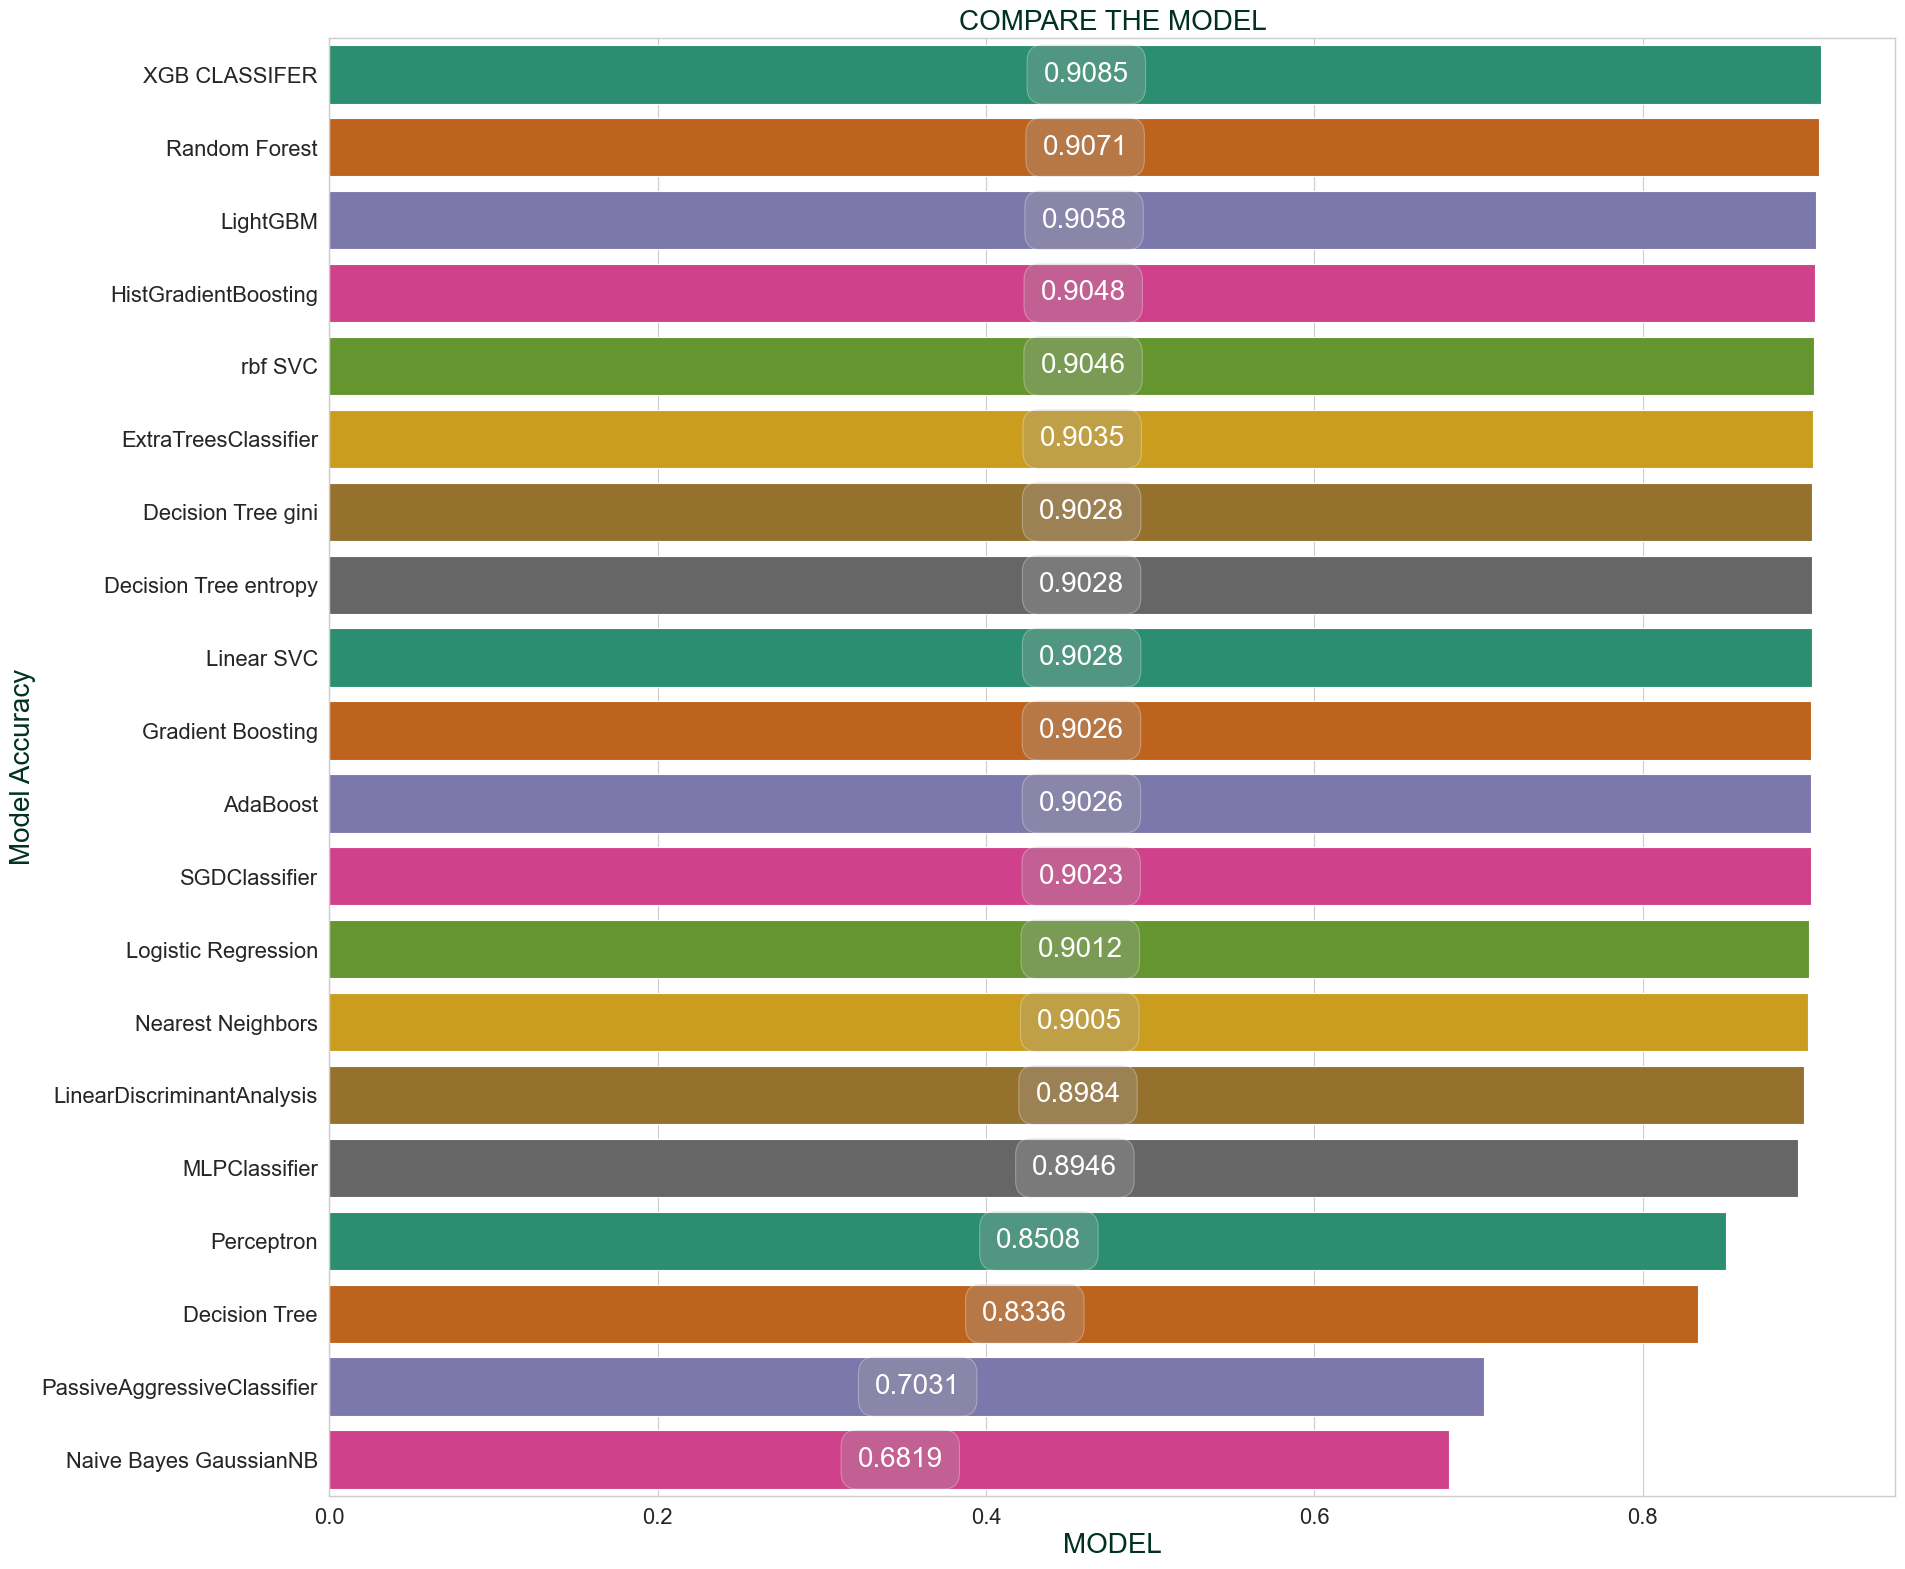

In [74]:
p = plt.figure(figsize=(18,18))
p = sns.set_palette('bright')
p = sns.set_context('paper', font_scale=1.8)

p = models=Best_score.sort_values(by='Accuracy Scores',ascending=False)[:20]

p = sns.barplot(y= 'Classifiers', x= 'Accuracy Scores', data= models,palette='Dark2')

for container in p.containers:
    p.bar_label(container,label_type = 'center',padding = 8,size = 20,color = "White",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "#a9a9a9", "edgecolor": "white", "alpha": .3})

plt.title('COMPARE THE MODEL',fontsize=20,color='#013220')
plt.xlabel('MODEL',fontsize=20,color='#013220')
plt.ylabel('Model Accuracy',fontsize=20,color='#013220'); 

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.metrics import precision_score


Rf = RandomForestClassifier(n_jobs=5,criterion='entropy',n_estimators=1000,verbose=False,random_state=51)
Rf.fit(X_train,y_train)

y_pred = Rf.predict(X_test)

print(f"\033[034m\033[1m")
print("Accuracy Score : ",round(accuracy_score(y_test,y_pred)*100,2),"%")
print("*******"*9)
print("Precision Score: ",round(precision_score(y_test,y_pred)*100,2),"%")
print("*******"*9)
print(f"\033[032m\033[1m")
print("F1 Score :",round(f1_score(y_test,y_pred)*100,2),"%")
print("*******"*9)
print(f"\033[035m\033[1m")
print("Confusin Matrix :\n",confusion_matrix(y_test,y_pred))
print(f"\033[031m\033[1m")
print("*******"*9)
print("Classification Report: \n",classification_report(y_test,y_pred))


Accuracy Score :  90.73 %
***************************************************************
Precision Score:  85.71 %
***************************************************************

F1 Score : 10.57 %
***************************************************************

Confusin Matrix :
 [[3952    4]
 [ 402   24]]

***************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      3956
           1       0.86      0.06      0.11       426

    accuracy                           0.91      4382
   macro avg       0.88      0.53      0.53      4382
weighted avg       0.90      0.91      0.87      4382



In [76]:
feature_importances = pd.DataFrame({
    'features': X.columns,
    'importance': Rf.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


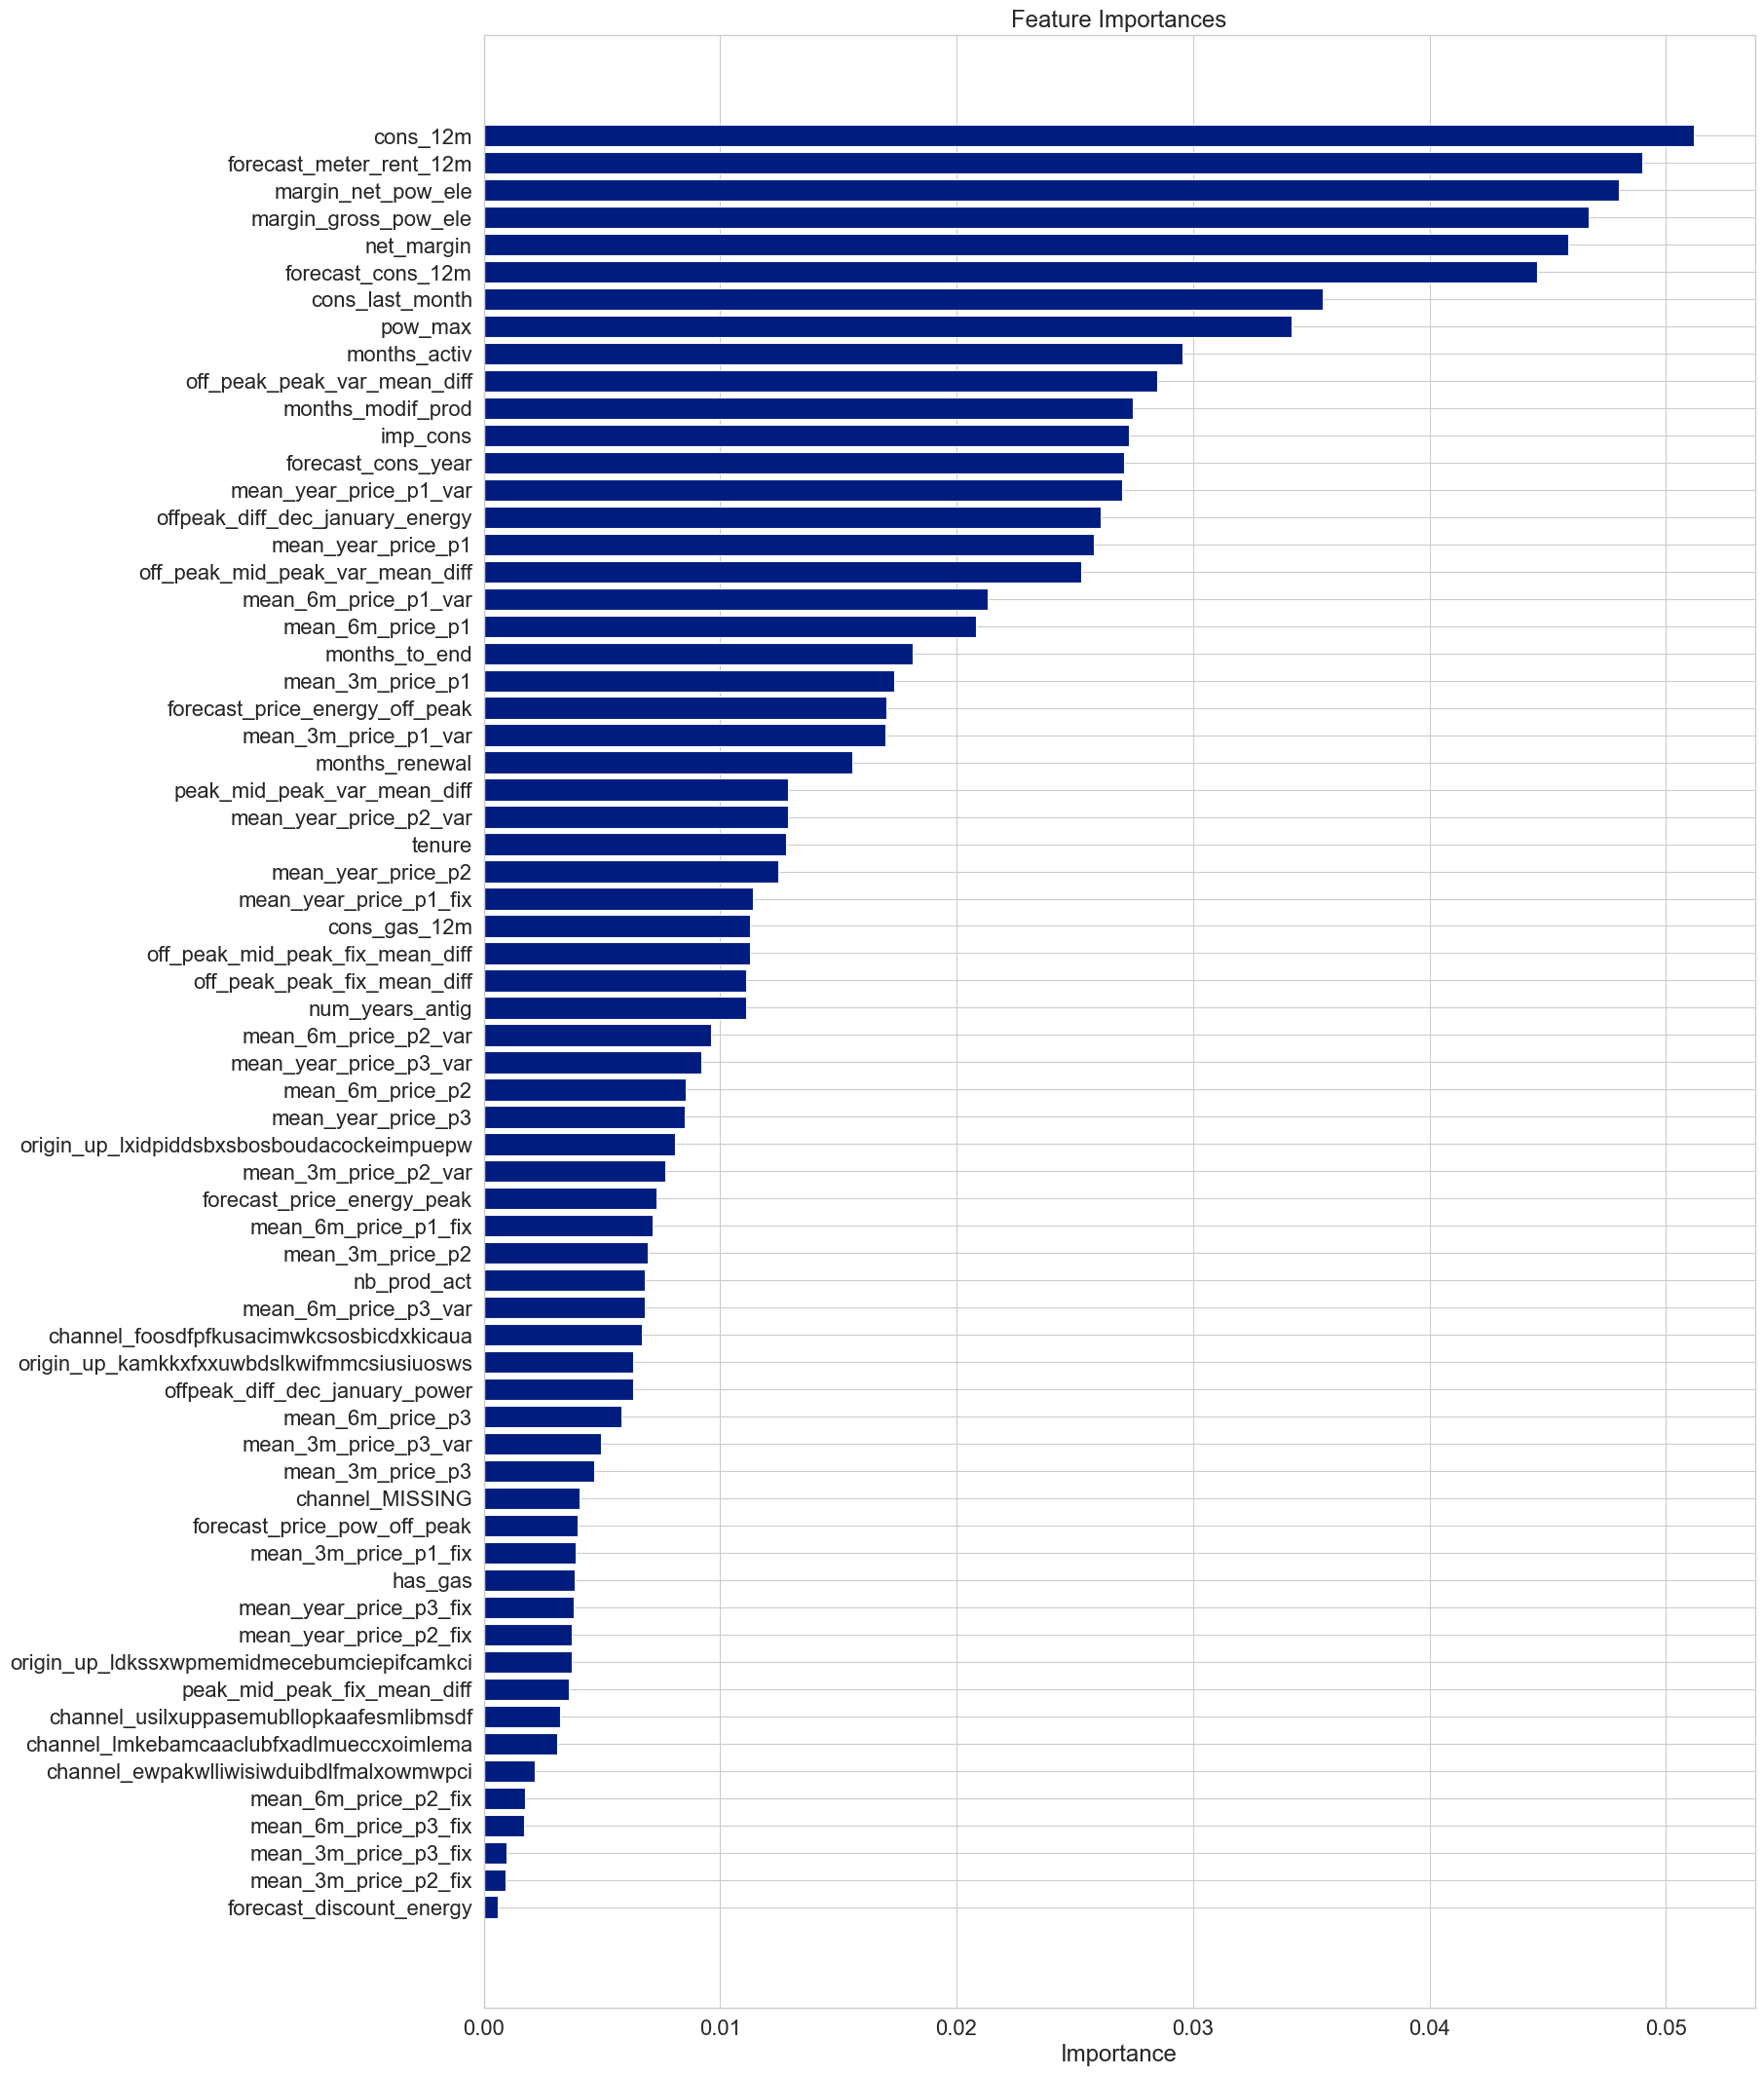

In [77]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [78]:
y_train.value_counts()

churn
0    9230
1     993
Name: count, dtype: int64

In [79]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [80]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
X_train_sm.shape, y_train_sm.shape


((18460, 66), (18460,))

In [81]:
 y_train_sm.value_counts()

churn
0    9230
1    9230
Name: count, dtype: int64

In [82]:
names = ["Logistic Regression", "Random Forest","Naive Bayes GaussianNB","Naive Bayes_BernoulliNB","MLPClassifier",
         "Nearest Neighbors","ExtraTreesClassifier","Linear SVC","rbf SVC","SGDClassifier","AdaBoost","Decision Tree",
         "Decision Tree gini","Decision Tree entropy","Gradient Boosting","LightGBM","LinearDiscriminantAnalysis",
         "QuadraticDiscriminantAnalysis","Perceptron","PassiveAggressiveClassifier",
        "HistGradientBoosting","Xgboost"]

classifiers = [
LogisticRegression(random_state=0),
RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=0),
GaussianNB(),
BernoulliNB(),
MLPClassifier(random_state=0),
KNeighborsClassifier(9),
ExtraTreesClassifier(n_estimators= 100),
SVC(kernel='linear',gamma='auto',probability=True),
SVC(kernel = "rbf", gamma=2, C=1),
SGDClassifier(max_iter=1000, tol=1e-4),
AdaBoostClassifier(random_state=0),
DecisionTreeClassifier(random_state=0),
DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0),
DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0),
GradientBoostingClassifier(n_estimators=100,max_features='sqrt'),
lgb.LGBMClassifier(random_state=0),
LinearDiscriminantAnalysis(),
QuadraticDiscriminantAnalysis(),
Perceptron(random_state=0),
PassiveAggressiveClassifier(random_state=0),
HistGradientBoostingClassifier(random_state=0),
XGBClassifier(random_state=0)

]

accuracy_scores = []
# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X_train_sm, y_train_sm)
    score = clf.score(X_test, y_test)
    score = round(score, 4)
    accuracy_scores.append(score)
    print(name ,' : ' , score)

classifiers_performance = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores})

Best_score = classifiers_performance.sort_values(by = 'Accuracy Scores' , ascending = False)[['Classifiers', 'Accuracy Scores']]
Best_score

Logistic Regression  :  0.6109
Random Forest  :  0.9016
Naive Bayes GaussianNB  :  0.5472
Naive Bayes_BernoulliNB  :  0.61
MLPClassifier  :  0.7932
Nearest Neighbors  :  0.6531
ExtraTreesClassifier  :  0.8932
Linear SVC  :  0.5568
rbf SVC  :  0.885
SGDClassifier  :  0.5532
AdaBoost  :  0.7754
Decision Tree  :  0.8092
Decision Tree gini  :  0.6111
Decision Tree entropy  :  0.6111
Gradient Boosting  :  0.8284
[LightGBM] [Info] Number of positive: 9230, number of negative: 9230
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15859
[LightGBM] [Info] Number of data points in the train set: 18460, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM  :  0.9039
LinearDiscriminantAnalysis  :  0.6031
QuadraticDiscriminantAnalysis  :  0.1547
Perceptron  :  0.5555
PassiveAggressiveClassifier  :

Classifiers  Accuracy Scores
15                       LightGBM           0.9039
1                   Random Forest           0.9016
21                        Xgboost           0.8991
20           HistGradientBoosting           0.8973
6            ExtraTreesClassifier           0.8932
8                         rbf SVC           0.8850
14              Gradient Boosting           0.8284
11                  Decision Tree           0.8092
4                   MLPClassifier           0.7932
10                       AdaBoost           0.7754
5               Nearest Neighbors           0.6531
12             Decision Tree gini           0.6111
13          Decision Tree entropy           0.6111
0             Logistic Regression           0.6109
3         Naive Bayes_BernoulliNB           0.6100
16     LinearDiscriminantAnalysis           0.6031
19    PassiveAggressiveClassifier           0.5806
7                      Linear SVC           0.5568
18                     Perceptron           0.5555
9                   SGDClassifier           0.5532
2          Naive Bayes GaussianNB           0.5472
17  QuadraticDiscriminantAnalysis           0.1547

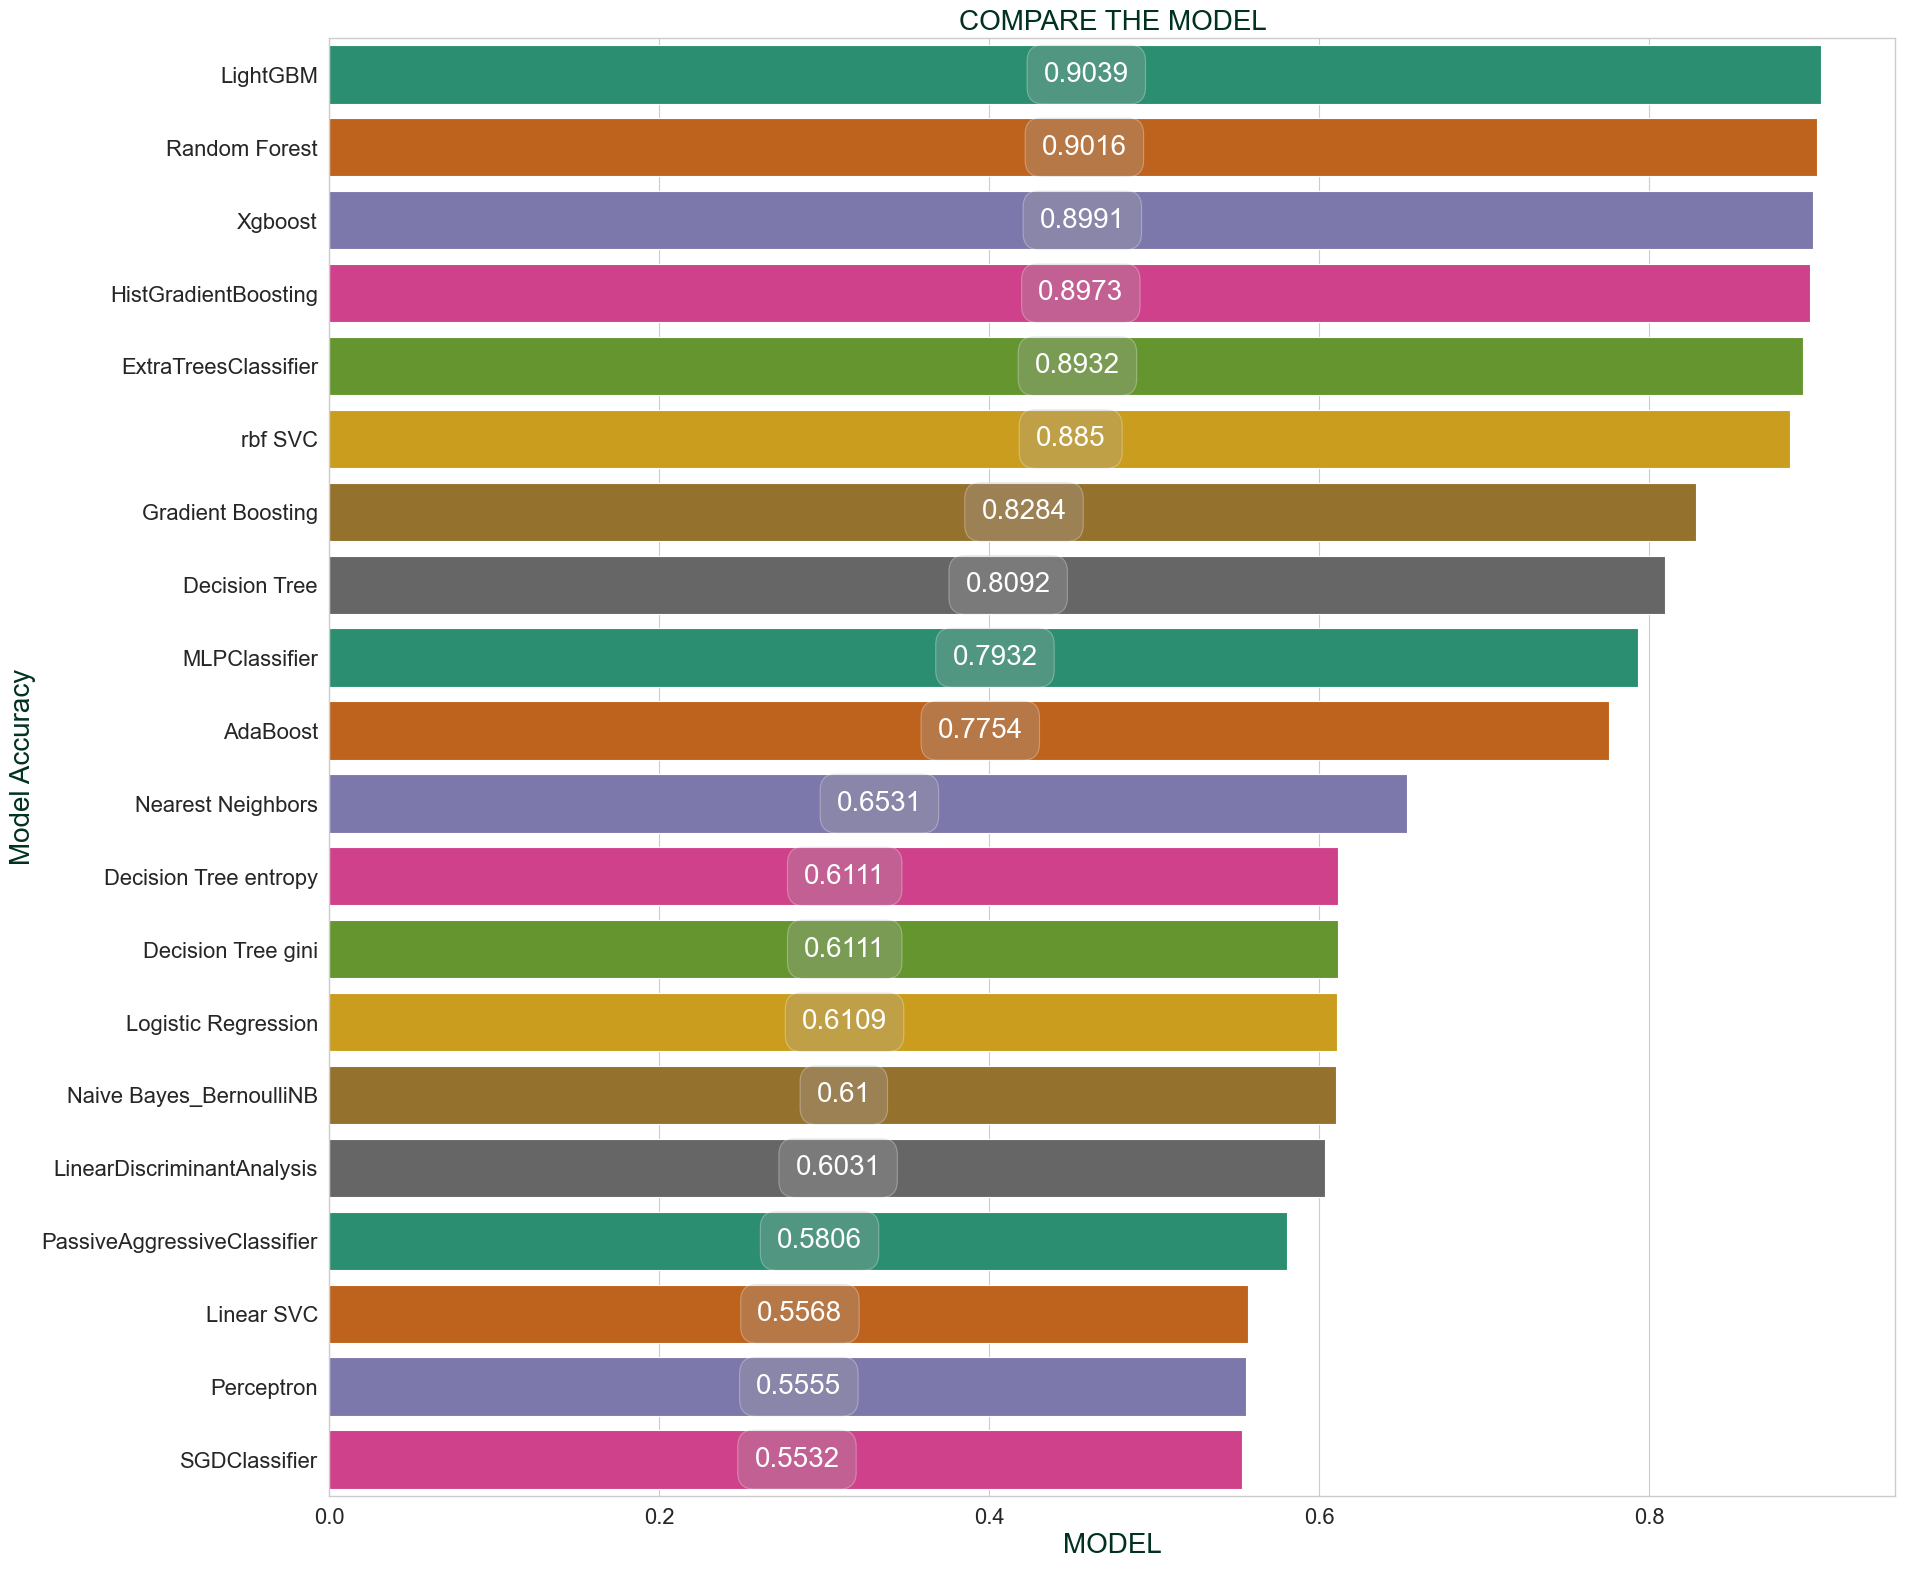

In [83]:
p = plt.figure(figsize=(18,18))
p = sns.set_palette('bright')
p = sns.set_context('paper', font_scale=1.8)

p = models=Best_score.sort_values(by='Accuracy Scores',ascending=False)[:20]

p = sns.barplot(y= 'Classifiers', x= 'Accuracy Scores', data= models,palette='Dark2')

for container in p.containers:
    p.bar_label(container,label_type = 'center',padding = 8,size = 20,color = "White",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "#a9a9a9", "edgecolor": "white", "alpha": .3})

plt.title('COMPARE THE MODEL',fontsize=20,color='#013220')
plt.xlabel('MODEL',fontsize=20,color='#013220')
plt.ylabel('Model Accuracy',fontsize=20,color='#013220'); 

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.metrics import precision_score


Rf = RandomForestClassifier(n_jobs=5,criterion='entropy',n_estimators=1000,verbose=False,random_state=51)
Rf.fit(X_train_sm,y_train_sm)

y_pred = Rf.predict(X_test)

print(f"\033[034m\033[1m")
print("Accuracy Score : ",round(accuracy_score(y_test,y_pred)*100,2),"%")
print("*******"*9)
print("Precision Score: ",round(precision_score(y_test,y_pred)*100,2),"%")
print("*******"*9)
print(f"\033[032m\033[1m")
print("F1 Score :",round(f1_score(y_test,y_pred)*100,2),"%")
print("*******"*9)
print(f"\033[035m\033[1m")
print("Confusin Matrix :\n",confusion_matrix(y_test,y_pred))
print(f"\033[031m\033[1m")
print("*******"*9)
print("Classification Report: \n",classification_report(y_test,y_pred))


Accuracy Score :  90.28 %
***************************************************************
Precision Score:  50.0 %
***************************************************************

F1 Score : 21.69 %
***************************************************************

Confusin Matrix :
 [[3897   59]
 [ 367   59]]

***************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      3956
           1       0.50      0.14      0.22       426

    accuracy                           0.90      4382
   macro avg       0.71      0.56      0.58      4382
weighted avg       0.87      0.90      0.88      4382



In [88]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# Define the objective function
def objective(space):
    clf = xgb.XGBClassifier(
        n_estimators = space['n_estimators'],
        max_depth = int(space['max_depth']),
        min_child_weight = space['min_child_weight'],
        subsample = space['subsample'],
        learning_rate = space['learning_rate'],
        gamma = space['gamma'],
        colsample_bytree = space['colsample_bytree'],
    )
    
    eval_set  = [(X_train_sm,y_train_sm), ( X_test, y_test)]
    
    clf.fit(X_train_sm,y_train_sm,
            eval_set=eval_set, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

# Define the search space
space ={
    'max_depth': hp.quniform("x_max_depth", 5, 30, 1),
    'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
    'subsample': hp.uniform ('x_subsample', 0.8, 1),
    'n_estimators' : hp.choice('x_n_estimators', np.arange(100, 1000, 100, dtype=int)),
    'learning_rate' : hp.quniform('x_learning_rate', 0.01, 0.5, 0.01),
    'gamma' : hp.quniform('x_gamma', 0.1, 0.5, 0.01),
    'colsample_bytree' : hp.quniform('x_colsample_bytree', 0.1, 1, 0.01)}

# Run the algorithm
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print(best)


SCORE:                                                                                                                 
0.9059790050205385                                                                                                     
SCORE:                                                                                                                 
0.8957097215883159                                                                                                     
SCORE:                                                                                                                 
0.9018712916476495                                                                                                     
SCORE:                                                                                                                 
0.8945686900958466                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.8931994523048836                                                                                                     
SCORE:                                                                                                                 
0.9018712916476495                                                                                                     
SCORE:                                                                                                                 
0.9016430853491556                                                                                                     
SCORE:                                                                                                                 
0.889776357827476                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
0.9052943861250571                                                                                                     
SCORE:                                                                                                                 
0.9043815609310817                                                                                                     
SCORE:                                                                                                                 
0.8922866271109082                                                                                                     
SCORE:                                                                                                                 
0.9043815609310817                                                                                                     
SCORE:                                  

In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Predict on the test set
pred = clf.predict(X_test)

print("Accuracy Score : ",round(accuracy_score(y_test,pred)*100,2),"%")

# Calculate precision
precision = precision_score(y_test, pred)
print("Precision: ", precision)

# Calculate recall
recall = recall_score(y_test, pred)
print("Recall: ", recall)

# Calculate F1 score
f1 = f1_score(y_test, pred)
print("F1 Score: ", f1)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, pred)
print("ROC AUC: ", roc_auc)


Accuracy Score :  89.91 %
Precision:  0.44871794871794873
Recall:  0.1643192488262911
F1 Score:  0.2405498281786942
ROC AUC:  0.5712900591957542


In [96]:
conf_mat_xmf = confusion_matrix(y_test, pred)

<Axes: title={'center': 'Confusion Matrix'}>

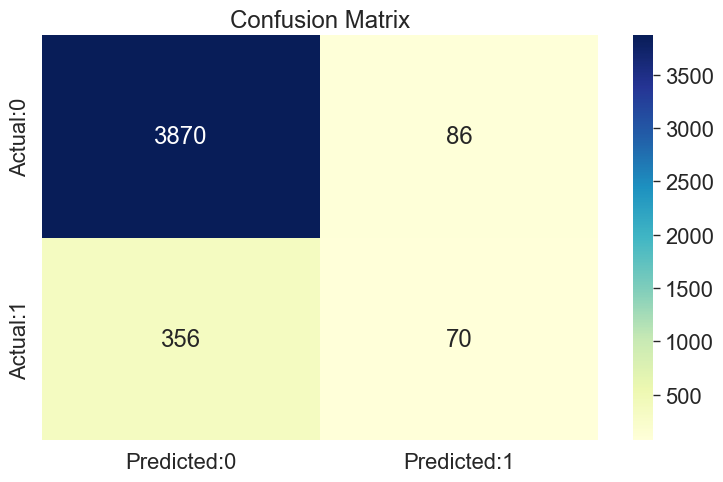

In [100]:

conf_matrix=pd.DataFrame(data=conf_mat_xmf,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix,annot=True, fmt="d",cmap="YlGnBu")


In [98]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': range(100, 1000, 100),
    'max_depth': range(5, 31),
    'min_child_weight': range(1, 11),
    'subsample': [0.8, 0.85, 0.9, 0.95, 1],
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5],
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
    'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

# Create the XGBoost classifier
xgb_clf = XGBClassifier()

# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_grid, n_iter=100, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
random_search.fit(X_train_sm, y_train_sm)

# Best parameters obtained from RandomizedSearchCV
best_params = random_search.best_params_

# Build the model with the best parameters
clf = XGBClassifier(**best_params)

# Fit the model
clf.fit(X_train_sm, y_train_sm)

# Predict on the validation set
pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy: 0.9098585120949338


In [99]:
# Predict on the test set
pred = clf.predict(X_test)

print("Accuracy Score : ",round(accuracy_score(y_test,pred)*100,2),"%")

# Calculate precision
precision = precision_score(y_test, pred)
print("Precision: ", precision)

# Calculate recall
recall = recall_score(y_test, pred)
print("Recall: ", recall)

# Calculate F1 score
f1 = f1_score(y_test, pred)
print("F1 Score: ", f1)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, pred)
print("ROC AUC: ", roc_auc)


Accuracy Score :  90.99 %
Precision:  0.6422018348623854
Recall:  0.1643192488262911
F1 Score:  0.26168224299065423
ROC AUC:  0.5772304029773517
